<a href="https://colab.research.google.com/github/Chachi36/Diabetes-Factors-Demo-Notebook/blob/main/Diabetes_Risk_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Risk Factor Analysis

This notebook explores a 5000-sample dataset.

*Disclaimer: Notebook is in third person voice as a convention, there is only one person (me - Charles Childress) working on this project.

## 1. Problem

In this notebook, our goal is to develop a model that can identify the major risk factors that contribute to the development of diabetes in an individual.

## 2. Data

The data we're using is from the Behavioral Risk Factor Surveillance System 2014 Codebook Report as provided by the U.S. Digital Corps' Data Science and Analytics pathway.

## 3. Evaluation

Standard Logistic Regression metrics including

## 4. Features

Some information about the data:
* We are working with a 5000-sample structured dataset presented in csv format.
* The response variable, `'DIABETE3'`, starts out multi-categorical.  
* There is a mixture of categorical, numerical, and ordinal data in this dataset.  

## 5. Getting Started!

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Importing our data

In [ ]:
# Read the CSV files to individual DataFrames
df_num = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_numeric.csv")
df_cat = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_categorical.csv")
df_ord = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_ordinal.csv")

print("\ndf_num has columns:")
print(df_num.columns)

print("\ndf_cat has columns:")
print(df_cat.columns)

print("\ndf_ord has columns:")
print(df_ord.columns)


df_num has columns:
Index(['PERSONID', 'DIABETE3', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS'], dtype='object')

df_cat has columns:
Index(['PERSONID', 'DIABETE3', '_RACE', 'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', '_TOTINDA',
       'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1',
       'DIABETE3.1', '_STATE', 'ASTHMA3', 'MARITAL.1'],
      dtype='object')

df_ord has columns:
Index(['PERSONID', 'DIABETE3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1',
       'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3'],
      dtype='object')


Since `"DIABETE3"` appears exactly the same on all 3 DataFrames, we are going to drop it from the `df_cat` and `df_ord` DataFrames before merging.  

Also of note is that `"DIABETE3"` and `"MARITAL"` appear twice in `df_cat`, so we will also drop the `"DIABETE3.1"` and `"MARITAL.1"` variables.

In [ ]:
# dropping columns
df_cat = df_cat.drop("DIABETE3", axis=1)
df_cat = df_cat.drop("DIABETE3.1", axis=1)
df_cat = df_cat.drop("MARITAL.1", axis=1)
df_ord = df_ord.drop("DIABETE3", axis=1)

In [ ]:
# Merge the DataFrames on PERSONID
merged_df1 = df_num.merge(df_cat, on="PERSONID")
merged_df2 = merged_df1.merge(df_ord, on="PERSONID")

# Check the columns of our merged DataFrame.
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
 6   _RACE     4997 non-null   float64
 7   MSCODE    3187 non-null   float64
 8   FLUSHOT6  4762 non-null   float64
 9   EMPLOY1   4981 non-null   float64
 10  SEX       5000 non-null   float64
 11  MARITAL   4990 non-null   float64
 12  CVDCRHD4  5000 non-null   float64
 13  HLTHCVR1  3318 non-null   float64
 14  CHCKIDNY  5000 non-null   float64
 15  USEEQUIP  4837 non-null   float64
 16  _TOTINDA  5000 non-null   float64
 17  ADDEPEV2  5000 non-null   float64
 18  RENTHOM1  4898 non-null   float64
 19  EXERANY2  5000 non-null   float64
 20  BLIND     4830 non-null   floa

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
merged_df2.to_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv", index=False)

### Peeking at some of the variables

In [1]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Let's create a quick counting function that will help us save time with future code.  We will call our function `'give_counts()'`.

In [2]:
# give_counts()
def give_counts(df, var):
  count_a = 0
  print(f"Counts for '{var}' are as follows:")
  for i in set(df[var]):
    if i >= 0.0:
      num = len(df[df[var] == i])
      print(f"The number of people who answered {i} for '{var}' is {num}.")
    else:
      count_a += 1
      continue
  print(f"The number of people who did not answer for '{var}' is {count_a}.")
  print(f"The total number of entries is {len(df[var])}.")
  return

In [3]:
# Make a temporary DataFrame to manipulate
tmp_df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv")

In [4]:
# DIABETE3 counts
give_counts(tmp_df, "DIABETE3")

Counts for 'DIABETE3' are as follows:
The number of people who answered 1.0 for 'DIABETE3' is 627.
The number of people who answered 2.0 for 'DIABETE3' is 39.
The number of people who answered 3.0 for 'DIABETE3' is 4251.
The number of people who answered 4.0 for 'DIABETE3' is 76.
The number of people who answered 7.0 for 'DIABETE3' is 2.
The number of people who answered 9.0 for 'DIABETE3' is 5.
The number of people who did not answer for 'DIABETE3' is 0.
The total number of entries is 5000.


In the results of the above code there are only 2 entries for `'7.0'` and 5 entries for `'9.0'`.  This by itself might be reason to discard these data points, as it is difficult to build a model with so few entries.  We argue that the data points should also be discarded on account of what they represent; "Don't know/Not Sure" and "Refused [to answer]".  We are attempting to create a model that can "identify risk factors for diabetes", so data points that don't give feedback about diabetes are useless to us.  

#### **The Question:** `'DIABETE3'`

"(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If respondent says pre-diabetes or borderline diabetes, use response code 4.)"

**Current DIABETE3 classifications:**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes
- 7.0 - Don't know/Not Sure
- 9.0 - Refused

**Proposed DIABETE3 classifications (without 7 counfounding data points):**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes

With all that in mind, let's drop these 7 data points then make a quick correlation matrix.

In [5]:
# dropping 7.0 and 9.0 entries
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 7.0) & ~(tmp_df.DIABETE3 == 9.0)]
len(tmp_df)

4993

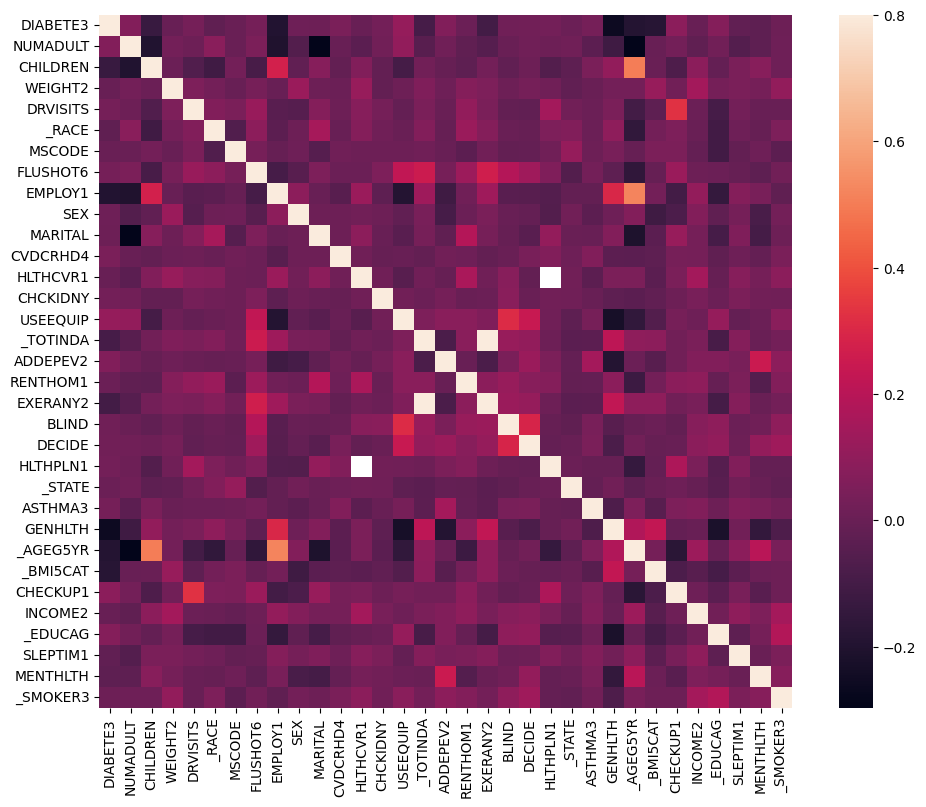

In [6]:
tmp_df = tmp_df.drop("PERSONID", axis=1)

#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [7]:
# correlation values
tmp_df.corr()['DIABETE3'].sort_values()

GENHLTH    -0.262288
EMPLOY1    -0.195581
_AGEG5YR   -0.192449
_BMI5CAT   -0.184727
CHILDREN   -0.130667
EXERANY2   -0.100523
_TOTINDA   -0.094097
MENTHLTH   -0.029373
_RACE      -0.023065
SLEPTIM1   -0.022054
WEIGHT2    -0.002622
HLTHCVR1   -0.002589
INCOME2    -0.001692
MSCODE     -0.000652
RENTHOM1    0.004468
_STATE      0.006365
_SMOKER3    0.010017
MARITAL     0.010931
SEX         0.012880
BLIND       0.017328
DECIDE      0.023833
HLTHPLN1    0.025467
CHCKIDNY    0.027210
DRVISITS    0.032040
ASTHMA3     0.032461
FLUSHOT6    0.032521
CVDCRHD4    0.041618
ADDEPEV2    0.062212
NUMADULT    0.064014
_EDUCAG     0.069299
CHECKUP1    0.087236
USEEQUIP    0.113116
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

In [8]:
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

What we've done above is we've made a heatmap of correlations and then picked out those top few that correlate (or anti-correlate) most highly with `DIABETE3`.  There is clearly lots of correlation between many of the variables as well that we should remember to account for later.  

#### **Correlation Thought Experiment**

The more correlation exists between the variables in our model, the more variance will be present.  Let's see if trimming some correlated variables can help our heatmap become more readable.  

In [9]:
# some additional tools
import statistics as stat
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

For the type of analysis we are about to run, a `VIF` score from:

- 0 to 1 - indicates low correlation with other variables
- 1 to 5 - indicates a moderate correlation with other variables
- over 5 - indicates a large correlation with other variables

In [10]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+_TOTINDA+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


     variable        VIF
0   Intercept   0.000000
1    NUMADULT   1.279734
2    CHILDREN   1.581101
3     WEIGHT2   1.044668
4    DRVISITS   1.118614
5       _RACE   1.069824
6      MSCODE   1.049888
7    FLUSHOT6   1.082400
8     EMPLOY1   1.664452
9         SEX   1.078101
10    MARITAL   1.253867
11   CVDCRHD4   1.012168
12   HLTHCVR1   1.044873
13   CHCKIDNY   1.014935
14   USEEQUIP   1.247354
15   _TOTINDA  83.165754
16   ADDEPEV2   1.153168
17   RENTHOM1   1.072753
18   EXERANY2  83.698476
19      BLIND   1.059302
20     DECIDE   1.089915
21   HLTHPLN1   0.000000
22     _STATE   1.023191
23    ASTHMA3   1.045196
24    GENHLTH   1.482458
25   _AGEG5YR   2.356012
26   _BMI5CAT   1.142287
27   CHECKUP1   1.134571
28    INCOME2   1.061954
29    _EDUCAG   1.186324
30   SLEPTIM1   1.044270
31   MENTHLTH   1.169750
32   _SMOKER3   1.102611


The high correlation results we are seeing here with `'_TOTINDA'` and `'EXERANY2'` makes complete sense.  

**As stated in the provided data bible:**
- `'_TOTINDA'` - "Adults who reported doing physical activity or exercise during the past 30 days other than their regular job"
- `'EXERANY2'` - "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"

Since `'EXERANY2'` has a more significant effect at `-0.100523` (versus `'_TOTINDA'` at `-0.094097`), we are going to drop the `'_TOTINDA'` variable and run the `VIF` again.

In [11]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


     variable       VIF
0   Intercept  0.000000
1    NUMADULT  1.279430
2    CHILDREN  1.580749
3     WEIGHT2  1.044667
4    DRVISITS  1.110729
5       _RACE  1.069728
6      MSCODE  1.047773
7    FLUSHOT6  1.081271
8     EMPLOY1  1.663848
9         SEX  1.077975
10    MARITAL  1.251949
11   CVDCRHD4  1.011994
12   HLTHCVR1  1.044608
13   CHCKIDNY  1.014860
14   USEEQUIP  1.247265
15   ADDEPEV2  1.151312
16   RENTHOM1  1.072570
17   EXERANY2  1.147209
18      BLIND  1.058977
19     DECIDE  1.089607
20   HLTHPLN1  0.000000
21     _STATE  1.022780
22    ASTHMA3  1.043889
23    GENHLTH  1.480194
24   _AGEG5YR  2.356011
25   _BMI5CAT  1.139861
26   CHECKUP1  1.133619
27    INCOME2  1.059613
28    _EDUCAG  1.185114
29   SLEPTIM1  1.043470
30   MENTHLTH  1.169697
31   _SMOKER3  1.090207


Since there is only moderate correlation left, this is as much pruning as we will do right now.  Let's take a quick look at the correlation matrix and our top most interesting variables.

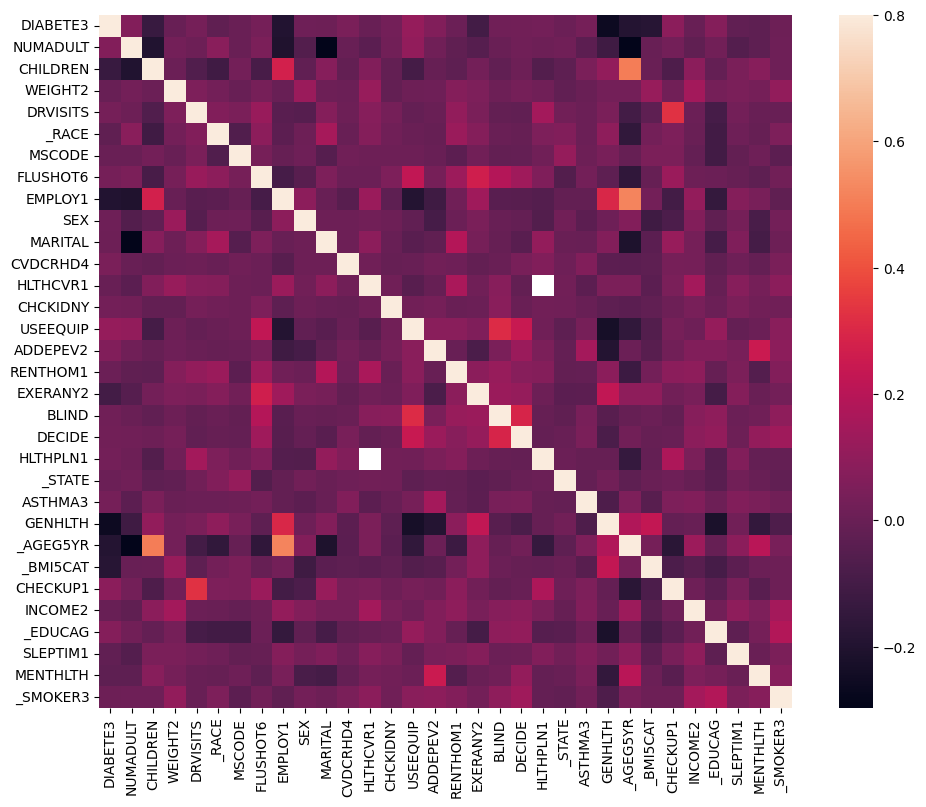

In [12]:
# drop _TOTINDA
tmp_df.drop("_TOTINDA", axis=1, inplace=True)

#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [13]:
# top values to peek at according to correlation with DIABETE3
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

#### **Quick Data Visualization**

In a series of plots below, we are going to compare the response variable `'DIABETE3'` to the five of the independent variables that it was most highly correlated with (`'CHILDREN'`, `'_BMI5CAT'`, `'_AGEG5YR'`, `'EMPLOY1'`, and `'GENHLTH'`) in the previous section's findings.  

**Variable Details:**
- `'CHILDREN'` - "How many children less than 18 years of age live in your household?"
- `'_BMI5CAT'` - "Four-categories of Body Mass Index (BMI)"
- `'_AGEG5YR'` - "Fourteen-level age category"
- `'EMPLOY1'` - "Are you currently…?" [Question about employment]
- `'GENHLTH'` - "Would you say that in general your health is:" [Question about general health]

A simplified binomial look at the `'DIABETE3'` variable will help us visualize the above singled out variables.  Since there are far more entries for `'1.0'` and `'3.0'` (diabetes and no diabetes) than for `'2.0'` and `'4.0'` (pregnancy and pre-diabetes), let's drop responses `'2.0'` and `'4.0'`  from the temporary DataFrame we are working with and create a new variable `'DIABETE_SIMP'` that assigns `'0'` for `'3.0'` (patient does not have diabetes) and `'1'` for `'1.0'` (patient has diabetes).

In [14]:
# before dropping
print("Before dropping:", len(tmp_df))

# dropping 2.0 entries and 4.0 entries
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 2.0)]
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 4.0)]

# reset the index
tmp_df.reset_index(inplace=True)
print("After dropping:", len(tmp_df))

Before dropping: 4993
After dropping: 4878


In [15]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)

In [16]:
# creating DIABETE_SIMP
li1 = tmp_df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 1.0:
    li2.append(1)
  else:
    li2.append(0)

tmp_df["DIABETE_SIMP"] = li2

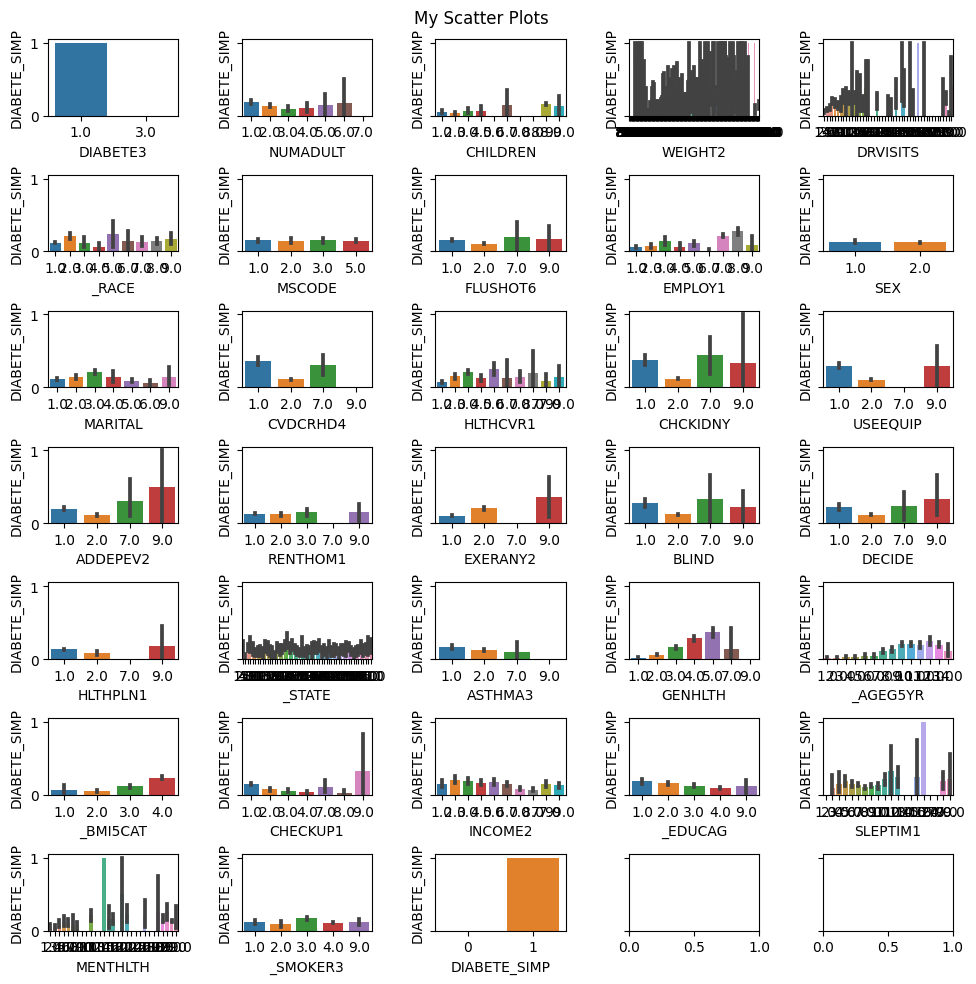

In [17]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(tmp_df.columns[:]):
  if i <= 4:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

Wow!  Obviously we have some pretty useless plots amongst these that are worth taking a deeper look at on the basis of weird shape alone.  We'll come back around and run the above code again in the following sections to see how we have done in rescaling or dropping data.  

Before looking at our most impactful variables, we need to address the completely useless `'WEIGHT2'` variable.

#### **Variable:** `'WEIGHT2'`

**Numeric variable**

"About how much do you weigh without shoes? (If respondent answers in metrics put a 9 in the first column)[Round fractions up.]"

**Possible Responses:**
- 50 - 0999 - Weight (pounds)

- 7777 - Don't know/Not sure

- 9000 - 9998 - Weight (kilograms)
Notes: The initial '9' indicates this was a metric value.

- 9999 - Refused

In [18]:
# WEIGHT2 counts
give_counts(tmp_df, "WEIGHT2")

Counts for 'WEIGHT2' are as follows:
The number of people who answered 106.0 for 'WEIGHT2' is 3.
The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 219.0 for 'WEIGHT2' is 4.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 61.
The number of people who answered 121.0 for 'WEIGHT2' is 4.
The number o

The `'WEIGHT2'` variable is a mess, with some weights being in kilos, some in pounds, and a strong tendency to fall on a multiple of five.  We are going to turn it all into pounds, then put it into bins of size 10 until 300lbs, size 20 until 400, then size 50 until 500.  The rescaled variable will be laid out as so.  

**Possible Responses:**
- 1 - 70 <= Weight (lbs) < 80
- 2 - 80 <= Weight (lbs) < 90
- 3 - 90 <= Weight (lbs) < 100
- 4 - 100 <= Weight (lbs) < 110
- 5 - 110 <= Weight (lbs) < 120
- 6 - 120 <= Weight (lbs) < 130
- 7 - 130 <= Weight (lbs) < 140
- 8 - 140 <= Weight (lbs) < 150
- 9 - 150 <= Weight (lbs) < 160
- 10 - 160 <= Weight (lbs) < 170
- 11 - 170 <= Weight (lbs) < 180
- 12 - 180 <= Weight (lbs) < 190
- 13 - 190 <= Weight (lbs) < 200
- 14 - 200 <= Weight (lbs) < 210
- 15 - 210 <= Weight (lbs) < 220
- 16 - 220 <= Weight (lbs) < 230
- 17 - 230 <= Weight (lbs) < 240
- 18 - 240 <= Weight (lbs) < 250
- 19 - 250 <= Weight (lbs) < 260
- 20 - 260 <= Weight (lbs) < 270
- 21 - 270 <= Weight (lbs) < 280
- 22 - 280 <= Weight (lbs) < 290
- 23 - 290 <= Weight (lbs) < 300
- 24 - 300 <= Weight (lbs) < 320
- 25 - 330 <= Weight (lbs) < 340
- 26 - 340 <= Weight (lbs) < 360
- 27 - 360 <= Weight (lbs) < 380
- 28 - 380 <= Weight (lbs) < 400
- 29 - 400 <= Weight (lbs) < 450
- 30 - 450 <= Weight (lbs) < 500
- 31 - Weight (lbs) >= 500
- 50 - Don't know/Not sure
- 55 - Refused

**Drop Rationale**

Before anything else, we need to drop the 50 missing values.  We are going to be using the `'WEIGHT'` variable to try and fill missing values in `'BMI5_CAT'` later.  Trying to fill the 50 missing `'WEIGHT'` entries here would potentially skew results when trying to fill the larger number of missing entries in `'BMI5_CAT'`.  

In [19]:
# before dropping
print("Before dropping:", len(tmp_df))

# drop rows with empty values in _RACE column
tmp_df = tmp_df[(tmp_df.WEIGHT2 > 0)]

# reset the index
tmp_df.reset_index(inplace=True)

# after dropping
print("After dropping:", len(tmp_df))
print("")

# sum missing data
tmp_df.isna().sum()

Before dropping: 4878
After dropping: 4828



index              0
DIABETE3           0
NUMADULT        1698
CHILDREN           1
WEIGHT2            0
DRVISITS        1385
_RACE              2
MSCODE          1748
FLUSHOT6         186
EMPLOY1            0
SEX                0
MARITAL            0
CVDCRHD4           0
HLTHCVR1        1620
CHCKIDNY           0
USEEQUIP         112
ADDEPEV2           0
RENTHOM1          51
EXERANY2           0
BLIND            119
DECIDE           120
HLTHPLN1           0
_STATE             0
ASTHMA3            0
GENHLTH            0
_AGEG5YR           0
_BMI5CAT         262
CHECKUP1           0
INCOME2            0
_EDUCAG            0
SLEPTIM1           0
MENTHLTH           0
_SMOKER3           0
DIABETE_SIMP       0
dtype: int64

**Kilos to Pounds**

In [20]:
import math

# transform the WEIGHT2 variable
li1 = tmp_df["WEIGHT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 9000 and li1[i] <= 9998:
    rounded = math.ceil(float(str(li1[i])[1:])*2.204623)
    li2.append(float(rounded))
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2", axis=1, inplace=True)
tmp_df["WEIGHT2"] = li2

In [21]:
# WEIGHT2 counts
give_counts(tmp_df, "WEIGHT2")

Counts for 'WEIGHT2' are as follows:
The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 61.
The number of people who answered 98.0 for 'WEIGHT2' is 1.
The number of people who answered 99.0 for 'WEIGHT2' is 4.
The number of people who answered 100.0 for 'WEIGHT2' is 21.
The number of

Success!

**Pounds to Bin Categories**

In [22]:
# transform the WEIGHT2 variable
li1 = tmp_df["WEIGHT2"]
li2, li3 = [], []

for i in range(len(li1)):
  if li1[i] <= 1000:
    if li1[i] >= 70 and li1[i] < 80:
      li2.append(1)
      li3.append(1)
    elif li1[i] >= 80 and li1[i] < 90:
      li2.append(2)
      li3.append(1)
    elif li1[i] >= 90 and li1[i] < 100:
      li2.append(3)
      li3.append(1)
    elif li1[i] >= 100 and li1[i] < 110:
      li2.append(4)
      li3.append(2)
    elif li1[i] >= 110 and li1[i] < 120:
      li2.append(5)
      li3.append(2)
    elif li1[i] >= 120 and li1[i] < 130:
      li2.append(6)
      li3.append(2)
    elif li1[i] >= 130 and li1[i] < 140:
      li2.append(7)
      li3.append(2)
    elif li1[i] >= 140 and li1[i] < 150:
      li2.append(8)
      li3.append(2)
    elif li1[i] >= 150 and li1[i] < 160:
      li2.append(9)
      li3.append(3)
    elif li1[i] >= 160 and li1[i] < 170:
      li2.append(10)
      li3.append(3)
    elif li1[i] >= 170 and li1[i] < 180:
      li2.append(11)
      li3.append(3)
    elif li1[i] >= 180 and li1[i] < 190:
      li2.append(12)
      li3.append(3)
    elif li1[i] >= 190 and li1[i] < 200:
      li2.append(13)
      li3.append(3)
    elif li1[i] >= 200 and li1[i] < 210:
      li2.append(14)
      li3.append(4)
    elif li1[i] >= 210 and li1[i] < 220:
      li2.append(15)
      li3.append(4)
    elif li1[i] >= 220 and li1[i] < 230:
      li2.append(16)
      li3.append(4)
    elif li1[i] >= 230 and li1[i] < 240:
      li2.append(17)
      li3.append(4)
    elif li1[i] >= 240 and li1[i] < 250:
      li2.append(18)
      li3.append(4)
    elif li1[i] >= 250 and li1[i] < 260:
      li2.append(19)
      li3.append(5)
    elif li1[i] >= 260 and li1[i] < 270:
      li2.append(20)
      li3.append(5)
    elif li1[i] >= 270 and li1[i] < 280:
      li2.append(21)
      li3.append(5)
    elif li1[i] >= 280 and li1[i] < 290:
      li2.append(22)
      li3.append(5)
    elif li1[i] >= 290 and li1[i] < 300:
      li2.append(23)
      li3.append(5)
    elif li1[i] >= 300 and li1[i] < 320:
      li2.append(24)
      li3.append(6)
    elif li1[i] >= 320 and li1[i] < 340:
      li2.append(25)
      li3.append(6)
    elif li1[i] >= 340 and li1[i] < 360:
      li2.append(26)
      if li1[i] < 350:
        li3.append(6)
      else:
        li3.append(7)
    elif li1[i] >= 360 and li1[i] < 380:
      li2.append(27)
      li3.append(7)
    elif li1[i] >= 380 and li1[i] < 400:
      li2.append(28)
      li3.append(7)
    elif li1[i] >= 400 and li1[i] < 450:
      li2.append(29)
      li3.append(7)
    elif li1[i] >= 450 and li1[i] < 500:
      li2.append(30)
      li3.append(7)
    elif li1[i] >= 500:
      li2.append(31)
      li3.append(7)
  else:
    li2.append(li1[i])
    li3.append(li1[i])

#tmp_df.drop("WEIGHT2", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT"] = li2
tmp_df["WEIGHT2_CAT2"] = li3

In [23]:
# WEIGHT2_CAT counts
give_counts(tmp_df, "WEIGHT2_CAT")

Counts for 'WEIGHT2_CAT' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT' is 1.
The number of people who answered 2.0 for 'WEIGHT2_CAT' is 4.
The number of people who answered 3.0 for 'WEIGHT2_CAT' is 17.
The number of people who answered 4.0 for 'WEIGHT2_CAT' is 77.
The number of people who answered 5.0 for 'WEIGHT2_CAT' is 147.
The number of people who answered 6.0 for 'WEIGHT2_CAT' is 273.
The number of people who answered 7.0 for 'WEIGHT2_CAT' is 388.
The number of people who answered 8.0 for 'WEIGHT2_CAT' is 368.
The number of people who answered 9.0 for 'WEIGHT2_CAT' is 411.
The number of people who answered 10.0 for 'WEIGHT2_CAT' is 484.
The number of people who answered 11.0 for 'WEIGHT2_CAT' is 417.
The number of people who answered 12.0 for 'WEIGHT2_CAT' is 382.
The number of people who answered 13.0 for 'WEIGHT2_CAT' is 360.
The number of people who answered 14.0 for 'WEIGHT2_CAT' is 335.
The number of people who answered 9999.0 for 'WEIGHT2_CAT' is 14

In [24]:
# WEIGHT2_CAT2 counts
give_counts(tmp_df, "WEIGHT2_CAT2")

Counts for 'WEIGHT2_CAT2' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT2' is 22.
The number of people who answered 2.0 for 'WEIGHT2_CAT2' is 1253.
The number of people who answered 3.0 for 'WEIGHT2_CAT2' is 2054.
The number of people who answered 4.0 for 'WEIGHT2_CAT2' is 974.
The number of people who answered 5.0 for 'WEIGHT2_CAT2' is 246.
The number of people who answered 6.0 for 'WEIGHT2_CAT2' is 55.
The number of people who answered 7777.0 for 'WEIGHT2_CAT2' is 61.
The number of people who answered 7.0 for 'WEIGHT2_CAT2' is 16.
The number of people who answered 9999.0 for 'WEIGHT2_CAT2' is 147.
The number of people who did not answer for 'WEIGHT2_CAT2' is 0.
The total number of entries is 4828.


Nice!

**Don't Know/Refused**

In [25]:
# transform the WEIGHT2_CAT variable
li1 = tmp_df["WEIGHT2_CAT"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 7000 and li1[i] < 9000:
    li2.append(50)
  elif li1[i] == 9999.0:
    li2.append(55)
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2_CAT", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT"] = li2

In [26]:
# transform the WEIGHT2_CAT2 variable
li1 = tmp_df["WEIGHT2_CAT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 7000 and li1[i] < 9000:
    li2.append(50)
  elif li1[i] == 9999.0:
    li2.append(55)
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2_CAT2", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT2"] = li2

**Final Counts to Double-Check**

In [27]:
# WEIGHT2_CAT counts
give_counts(tmp_df, "WEIGHT2_CAT")

Counts for 'WEIGHT2_CAT' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT' is 1.
The number of people who answered 2.0 for 'WEIGHT2_CAT' is 4.
The number of people who answered 3.0 for 'WEIGHT2_CAT' is 17.
The number of people who answered 4.0 for 'WEIGHT2_CAT' is 77.
The number of people who answered 5.0 for 'WEIGHT2_CAT' is 147.
The number of people who answered 6.0 for 'WEIGHT2_CAT' is 273.
The number of people who answered 7.0 for 'WEIGHT2_CAT' is 388.
The number of people who answered 8.0 for 'WEIGHT2_CAT' is 368.
The number of people who answered 9.0 for 'WEIGHT2_CAT' is 411.
The number of people who answered 10.0 for 'WEIGHT2_CAT' is 484.
The number of people who answered 11.0 for 'WEIGHT2_CAT' is 417.
The number of people who answered 12.0 for 'WEIGHT2_CAT' is 382.
The number of people who answered 13.0 for 'WEIGHT2_CAT' is 360.
The number of people who answered 14.0 for 'WEIGHT2_CAT' is 335.
The number of people who answered 15.0 for 'WEIGHT2_CAT' is 196.

In [28]:
# WEIGHT2_CAT2 counts
give_counts(tmp_df, "WEIGHT2_CAT2")

Counts for 'WEIGHT2_CAT2' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT2' is 22.
The number of people who answered 2.0 for 'WEIGHT2_CAT2' is 1253.
The number of people who answered 3.0 for 'WEIGHT2_CAT2' is 2054.
The number of people who answered 4.0 for 'WEIGHT2_CAT2' is 974.
The number of people who answered 5.0 for 'WEIGHT2_CAT2' is 246.
The number of people who answered 6.0 for 'WEIGHT2_CAT2' is 55.
The number of people who answered 7.0 for 'WEIGHT2_CAT2' is 16.
The number of people who answered 50.0 for 'WEIGHT2_CAT2' is 61.
The number of people who answered 55.0 for 'WEIGHT2_CAT2' is 147.
The number of people who did not answer for 'WEIGHT2_CAT2' is 0.
The total number of entries is 4828.


Looks good!

In [29]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)

In [30]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
tmp_df.corr()['DIABETE_SIMP'].abs().sort_values()

RENTHOM1        0.000849
HLTHCVR1        0.001509
INCOME2         0.002772
WEIGHT2         0.003833
MSCODE          0.006022
_STATE          0.009486
WEIGHT2_CAT2    0.013512
MARITAL         0.015109
_RACE           0.017427
SEX             0.018805
_SMOKER3        0.018807
DECIDE          0.020793
HLTHPLN1        0.021856
SLEPTIM1        0.023282
BLIND           0.027012
CHCKIDNY        0.029304
MENTHLTH        0.030227
DRVISITS        0.034107
ASTHMA3         0.035185
FLUSHOT6        0.039584
CVDCRHD4        0.048729
ADDEPEV2        0.062919
NUMADULT        0.070542
_EDUCAG         0.076923
WEIGHT2_CAT     0.079158
CHECKUP1        0.094674
EXERANY2        0.102260
USEEQUIP        0.125864
CHILDREN        0.144469
_BMI5CAT        0.212689
EMPLOY1         0.215557
_AGEG5YR        0.216905
GENHLTH         0.289954
DIABETE_SIMP    1.000000
DIABETE3        1.000000
Name: DIABETE_SIMP, dtype: float64

Quick comparison of the three variables plotted:

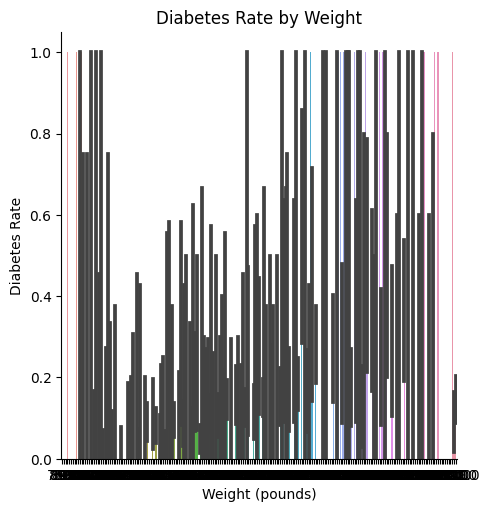

In [31]:
# WEIGHT2
sns.catplot(x="WEIGHT2", y="DIABETE_SIMP", data=tmp_df, kind="bar")
plt.title("Diabetes Rate by Weight")
plt.xlabel("Weight (pounds)")
plt.ylabel("Diabetes Rate")
plt.show()

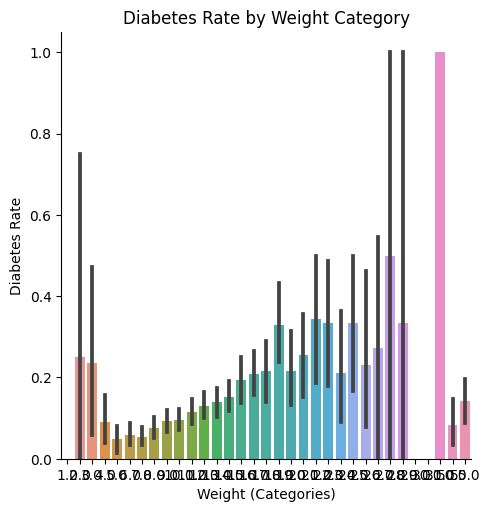

In [32]:
# WEIGHT2_CAT
sns.catplot(x="WEIGHT2_CAT", y="DIABETE_SIMP", data=tmp_df, kind="bar")
plt.title("Diabetes Rate by Weight Category")
plt.xlabel("Weight (Categories)")
plt.ylabel("Diabetes Rate")
plt.show()

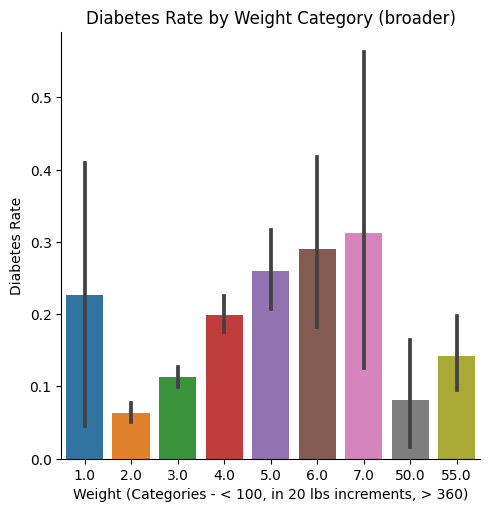

In [33]:
# WEIGHT2_CAT2
sns.catplot(x="WEIGHT2_CAT2", y="DIABETE_SIMP", data=tmp_df, kind="bar")
plt.title("Diabetes Rate by Weight Category (broader)")
plt.xlabel("Weight (Categories - < 100, in 20 lbs increments, > 360)")
plt.ylabel("Diabetes Rate")
plt.show()

Even after adjusting all `'WEIGHT2'` values to pounds, our `'WEIGHT2_CAT'` variable is much better suited to the data than the initial `'WEIGHT2'` variable.  Additionally, though our experimental broader `'WEIGHT2_CAT2'` did have less variability than our `'WEIGHT2_CAT'` variable, it is not even half as correlated with `'DIABETE_SIMP'`.  Let's drop `'WEIGHT2'`.  We will hold onto `'WEIGHT2_CAT2'` for now.

In [35]:
# dropping
tmp_df.drop("WEIGHT2", axis=1, inplace=True)

In [34]:
# verify columns
tmp_df.columns

Index(['DIABETE3', 'NUMADULT', 'CHILDREN', 'DRVISITS', '_RACE', 'MSCODE',
       'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1',
       'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND',
       'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR',
       '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH',
       '_SMOKER3', 'DIABETE_SIMP', 'WEIGHT2', 'WEIGHT2_CAT', 'WEIGHT2_CAT2'],
      dtype='object')

#### **Variable:** `'CHILDREN'`

"How many children less than 18 years of age live in your household?"

**Possible Responses:**
- 1 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 88 - "None"
- 99 - "Refused"

In [35]:
# CHILDREN counts
give_counts(tmp_df, "CHILDREN")

Counts for 'CHILDREN' are as follows:
The number of people who answered 1.0 for 'CHILDREN' is 506.
The number of people who answered 2.0 for 'CHILDREN' is 458.
The number of people who answered 3.0 for 'CHILDREN' is 184.
The number of people who answered 4.0 for 'CHILDREN' is 61.
The number of people who answered 99.0 for 'CHILDREN' is 21.
The number of people who answered 5.0 for 'CHILDREN' is 20.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 2.
The number of people who answered 88.0 for 'CHILDREN' is 3558.
The number of people who did not answer for 'CHILDREN' is 1.
The total number of entries is 4828.


**Drop Rationale**

There is only one patient who did not answer for number of children.  Since there are not many and it is a very difficult thing to justify guessing about, let's drop the twelve missing entries for `CHILDREN`.

In [36]:
# before dropping
print("Before dropping:", len(tmp_df))

# drop rows with empty values in _RACE column
tmp_df = tmp_df[(tmp_df.CHILDREN > 0)]

# after dropping
print("After dropping:", len(tmp_df))
print("")

# sum missing data
tmp_df.isna().sum()

Before dropping: 4828
After dropping: 4827



DIABETE3           0
NUMADULT        1698
CHILDREN           0
DRVISITS        1384
_RACE              2
MSCODE          1748
FLUSHOT6         186
EMPLOY1            0
SEX                0
MARITAL            0
CVDCRHD4           0
HLTHCVR1        1619
CHCKIDNY           0
USEEQUIP         112
ADDEPEV2           0
RENTHOM1          51
EXERANY2           0
BLIND            119
DECIDE           120
HLTHPLN1           0
_STATE             0
ASTHMA3            0
GENHLTH            0
_AGEG5YR           0
_BMI5CAT         261
CHECKUP1           0
INCOME2            0
_EDUCAG            0
SLEPTIM1           0
MENTHLTH           0
_SMOKER3           0
DIABETE_SIMP       0
WEIGHT2            0
WEIGHT2_CAT        0
WEIGHT2_CAT2       0
dtype: int64

Let's transform `'88.0'` to `'0.0'` and create a new, even more temporary DataFrame for just this variable plot that exclude responses of `'99.0'`.

In [37]:
# Even more temporary dataframe
tmp_df_2 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_2))

# dropping 99.0 entries
tmp_df_2 = tmp_df[:].copy()
tmp_df_2 = tmp_df_2[~(tmp_df_2.CHILDREN == 99.0)]

# reset the index
tmp_df_2.reset_index(inplace=True)
print("After dropping:", len(tmp_df_2))

Before dropping: 4827
After dropping: 4806


In [38]:
# transform the CHILDREN variable
li1 = tmp_df_2["CHILDREN"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

tmp_df_2["CHILDREN_SIMP"] = li2

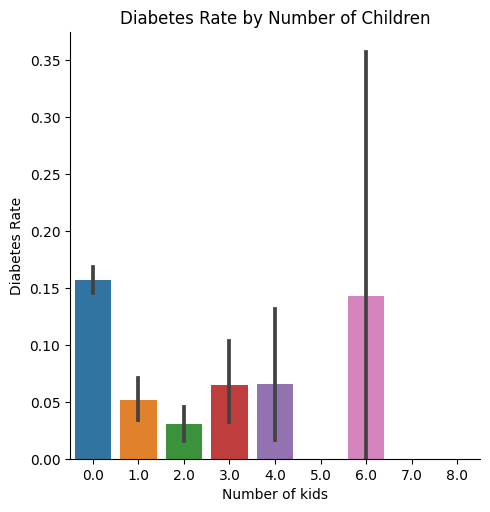

In [39]:
# CHILDREN_SIMP
sns.catplot(x="CHILDREN_SIMP", y="DIABETE_SIMP", data=tmp_df_2, kind="bar")
plt.title("Diabetes Rate by Number of Children")
plt.xlabel("Number of kids")
plt.ylabel("Diabetes Rate")
plt.show()

The plot above has increasing variance as the number of children increases.  Given this variance it is hard to see clear trends.  There may be a difference between the rates of folks with diabetes along the line of parenthood vs non-parenthood.  Let's check real quick.

In [40]:
# transform the CHILDREN_SIMP variable
li1 = tmp_df_2["CHILDREN_SIMP"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 0.0:
    li2.append(0)
  else:
    li2.append(1)

tmp_df_2["CHILDREN_SIMP_2"] = li2

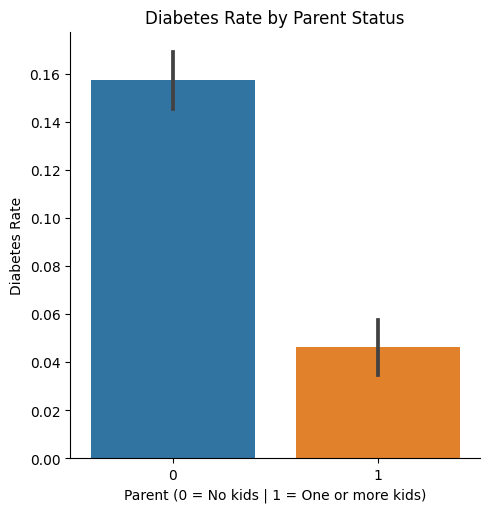

In [41]:
# CHILDREN_SIMP_2
sns.catplot(x="CHILDREN_SIMP_2", y="DIABETE_SIMP", data=tmp_df_2, kind="bar")
plt.title("Diabetes Rate by Parent Status")
plt.xlabel("Parent (0 = No kids | 1 = One or more kids)")
plt.ylabel("Diabetes Rate")
plt.show()

There does appear to be some difference between diabetes rates for people who have kids vs those without.  `'CHILDREN_SIMP_2'` might be more useful to our model than `'CHILDREN'` or `'CHILDREN_SIMP'`.

In [42]:
# Quick housecleaning
tmp_df_2.drop("index", axis=1, inplace=True)

In [43]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
tmp_df_2.corr()['DIABETE_SIMP'].abs().sort_values()

HLTHCVR1           0.000644
RENTHOM1           0.002462
INCOME2            0.003272
WEIGHT2            0.003524
MSCODE             0.004683
_STATE             0.007975
WEIGHT2_CAT2       0.013479
MARITAL            0.015476
SLEPTIM1           0.018783
_RACE              0.019761
SEX                0.019999
_SMOKER3           0.022054
HLTHPLN1           0.022255
DECIDE             0.027987
CHCKIDNY           0.029379
MENTHLTH           0.031982
DRVISITS           0.034158
ASTHMA3            0.035469
BLIND              0.036635
FLUSHOT6           0.045675
CVDCRHD4           0.048850
ADDEPEV2           0.063500
NUMADULT           0.068761
_EDUCAG            0.080042
WEIGHT2_CAT        0.080504
CHECKUP1           0.095424
EXERANY2           0.101521
CHILDREN_SIMP      0.119085
USEEQUIP           0.141540
CHILDREN_SIMP_2    0.145282
CHILDREN           0.145343
_BMI5CAT           0.212990
EMPLOY1            0.215250
_AGEG5YR           0.217333
GENHLTH            0.290220
DIABETE3           1

According to our rankings, `'CHILDREN_SIMP_2'` is neck and neck with `'CHILDREN'`.  We think that using `'CHILDREN_SIMP_2'` is better than using `'CHILDREN'` because of how much less variability there is in the former.  Let's drop `'CHILDREN'` and `'CHILDREN_SIMP'` from our dataframe.

In [44]:
# dropping
tmp_df_2.drop("CHILDREN", axis=1, inplace=True)
tmp_df_2.drop("CHILDREN_SIMP", axis=1, inplace=True)

In [45]:
# Pass tmp_df_2 back into tmp_df
tmp_df = tmp_df_2[:].copy()

In [46]:
# verify columns
tmp_df.columns

Index(['DIABETE3', 'NUMADULT', 'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6',
       'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY',
       'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE',
       'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT',
       'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3',
       'DIABETE_SIMP', 'WEIGHT2', 'WEIGHT2_CAT', 'WEIGHT2_CAT2',
       'CHILDREN_SIMP_2'],
      dtype='object')

#### **Variable:** `'_BMI5CAT'`

"Four-categories of Body Mass Index (BMI)"

**Possible Responses:**
- 1 - "Underweight (Notes: `'_BMI5'` < 18.50 (`'_BMI5'` has 2 implied decimal places))"
- 2 - "Normal Weight (Notes: 18.50 <= `'_BMI5'` < 25.00)"
- 3 - "Overweight (Notes: 25.00 <= `'_BMI5'` < 30.00)"
- 4 - "Obese (Notes: 30.00 <= `'_BMI5'` <= 99.99)"

In [47]:
# _BMI5CAT counts
give_counts(tmp_df, "_BMI5CAT")

Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1515.
The number of people who answered 3.0 for '_BMI5CAT' is 1611.
The number of people who answered 4.0 for '_BMI5CAT' is 1343.
The number of people who did not answer for '_BMI5CAT' is 253.
The total number of entries is 4806.


**Fill Rationale**

Let's create another super temporary dataframe and fill the missing `'_BMI5CAT'` responses from it.  We are going to fill these missing entries with the median value for `'_BMI5CAT'` of other entries that are in the same `'EXERANY2'` and `'WEIGHT2_CAT'` brackets.  The idea here is that a BMI usually has some decent correlation with activity level and mass.  

In [48]:
# temporary df
tmp_df_3 = tmp_df[:].copy()

# before dropping
print("Before filling:")

# _BMI5CAT counts
give_counts(tmp_df_3, "_BMI5CAT")

# Filling code - first by 'WEIGHT2_CAT'
tmp_df_3['_BMI5CAT'].fillna(tmp_df_3.groupby(['EXERANY2', 'WEIGHT2_CAT'])['_BMI5CAT'].transform('median'), inplace=True)

# # sum missing data
# tmp_df_3.isna().sum()

print("")
print("After filling:")

# _BMI5CAT counts
give_counts(tmp_df_3, "_BMI5CAT")

Before filling:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1515.
The number of people who answered 3.0 for '_BMI5CAT' is 1611.
The number of people who answered 4.0 for '_BMI5CAT' is 1343.
The number of people who did not answer for '_BMI5CAT' is 253.
The total number of entries is 4806.

After filling:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 85.
The number of people who answered 2.0 for '_BMI5CAT' is 1542.
The number of people who answered 3.0 for '_BMI5CAT' is 1632.
The number of people who answered 4.0 for '_BMI5CAT' is 1346.
The number of people who did not answer for '_BMI5CAT' is 201.
The total number of entries is 4806.


There seems to be something wrong, the only way there would be leftover values unfilled is if every patient who answered some specific value for either `'WEIGHT2_CAT'` or `'EXERANY2'` also did not have a `'_BMI5CAT'` measurement.  Let's do some quick investigating.  

In [49]:
len(np.where((tmp_df_3["WEIGHT2_CAT"] >= 50) & ~(tmp_df_3["_BMI5CAT"] >= 0))[0])

201

In [50]:
len(np.where((tmp_df_3["WEIGHT2_CAT"] >= 50) & (tmp_df_3["_BMI5CAT"] >= 0))[0])

0

Yep! This is exactly what happened to us.  Let's drop the rest of the unknown `'_BMI5CAT'` variables, which will clean up our `'WEIGHT2_CAT'` variable as well.  

In [51]:
# before dropping
print("Before dropping:")

# _BMI5CAT counts
give_counts(tmp_df_3, "_BMI5CAT")

# drop rows with empty values in _RACE column
tmp_df_3 = tmp_df_3[(tmp_df_3._BMI5CAT > 0)]

# after dropping
print("")
print("After dropping:")

# _BMI5CAT counts
give_counts(tmp_df_3, "_BMI5CAT")
print("")

# sum missing data
tmp_df_3.isna().sum()

Before dropping:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 85.
The number of people who answered 2.0 for '_BMI5CAT' is 1542.
The number of people who answered 3.0 for '_BMI5CAT' is 1632.
The number of people who answered 4.0 for '_BMI5CAT' is 1346.
The number of people who did not answer for '_BMI5CAT' is 201.
The total number of entries is 4806.

After dropping:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 85.
The number of people who answered 2.0 for '_BMI5CAT' is 1542.
The number of people who answered 3.0 for '_BMI5CAT' is 1632.
The number of people who answered 4.0 for '_BMI5CAT' is 1346.
The number of people who did not answer for '_BMI5CAT' is 0.
The total number of entries is 4605.



DIABETE3              0
NUMADULT           1629
DRVISITS           1325
_RACE                 2
MSCODE             1677
FLUSHOT6            156
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1546
CHCKIDNY              0
USEEQUIP             92
ADDEPEV2              0
RENTHOM1             40
EXERANY2              0
BLIND                99
DECIDE               99
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

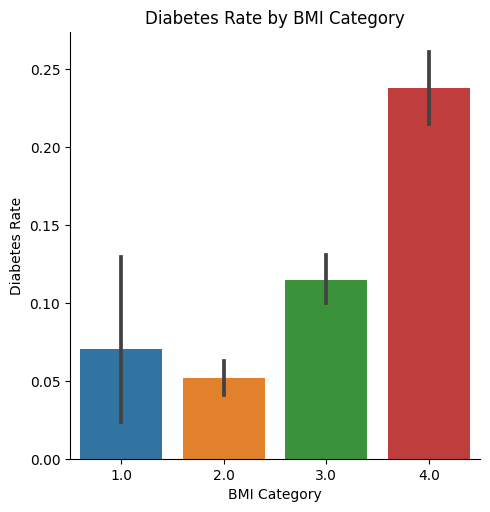

In [52]:
# _BMI5CAT
sns.catplot(x="_BMI5CAT", y="DIABETE_SIMP", data=tmp_df_3, kind="bar")
plt.title("Diabetes Rate by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Diabetes Rate")
plt.show()

This data is looking awful parabolic, though with the variability seen in the `1.0` category, that could be a mirage.  We may want to look into a transformation for `'_BMI5CAT'`.

In [53]:
# Pass tmp_df_3 back into tmp_df
tmp_df = tmp_df_3[:].copy()

#### **Variable:** `'_AGEG5YR'`

"Fourteen-level age category"

**Possible Responses:**
- 1 - Age 18 to 24 (Notes: 18 <= `'AGE'` <= 24)
- 2 - Age 25 to 29 (Notes: 25 <= `'AGE'` <= 29)
- 3 - Age 30 to 34 (Notes: 30 <= `'AGE'` <= 34)
- 4 - Age 35 to 39 (Notes: 35 <= `'AGE'` <= 39)
- 5 - Age 40 to 44 (Notes: 40 <= `'AGE'` <= 44)
- 6 - Age 45 to 49 (Notes: 45 <= `'AGE'` <= 49)
- 7 - Age 50 to 54 (Notes: 50 <= `'AGE'` <= 54)
- 8 - Age 55 to 59 (Notes: 55 <= `'AGE'` <= 59)
- 9 - Age 60 to 64 (Notes: 60 <= `'AGE'` <= 64)
- 10 - Age 65 to 69 (Notes: 65 <= `'AGE'` <= 69)
- 11 - Age 70 to 74 (Notes: 70 <= `'AGE'` <= 74)
- 12 - Age 75 to 79 (Notes: 75 <= `'AGE'` <= 79)
- 13 - Age 80 or older (Notes: 80 <= `'AGE'` <= 99)
- 14 - Don't know/Refused/Missing

In [54]:
# _AGEG5YR counts
give_counts(tmp_df, "_AGEG5YR")

Counts for '_AGEG5YR' are as follows:
The number of people who answered 1.0 for '_AGEG5YR' is 260.
The number of people who answered 2.0 for '_AGEG5YR' is 214.
The number of people who answered 3.0 for '_AGEG5YR' is 208.
The number of people who answered 4.0 for '_AGEG5YR' is 244.
The number of people who answered 5.0 for '_AGEG5YR' is 265.
The number of people who answered 6.0 for '_AGEG5YR' is 330.
The number of people who answered 7.0 for '_AGEG5YR' is 430.
The number of people who answered 8.0 for '_AGEG5YR' is 479.
The number of people who answered 9.0 for '_AGEG5YR' is 511.
The number of people who answered 10.0 for '_AGEG5YR' is 538.
The number of people who answered 11.0 for '_AGEG5YR' is 405.
The number of people who answered 12.0 for '_AGEG5YR' is 289.
The number of people who answered 13.0 for '_AGEG5YR' is 411.
The number of people who answered 14.0 for '_AGEG5YR' is 21.
The number of people who did not answer for '_AGEG5YR' is 0.
The total number of entries is 4605.


Let's create a super temporary df and drop the people who refuse to answer.

In [55]:
# temporary df
tmp_df_4 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_4))

# dropping
tmp_df_4 = tmp_df_4[~(tmp_df_4._AGEG5YR > 13.0)]

# reset the index
tmp_df_4.reset_index(inplace=True)
print("After dropping:", len(tmp_df_4))

Before dropping: 4605
After dropping: 4584


Plot it!

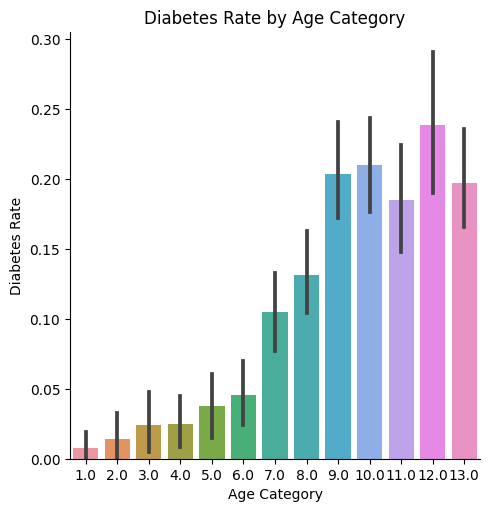

In [56]:
# _AGEG5YR
sns.catplot(x="_AGEG5YR", y="DIABETE_SIMP", data=tmp_df_4, kind="bar")
plt.title("Diabetes Rate by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Diabetes Rate")
plt.show()

Awesome!  The distribution of rates of diabetes is skewed towards people who fall in the older age categories.  Though there is some variance here, it might be worth taking a look at an exponential term for `'_AGEG5YR'` when we are preparing variables for our model.  

In [57]:
# Pass tmp_df_4 back into tmp_df
tmp_df = tmp_df_4[:].copy()

#### **Variable:** `'EMPLOY1'`



"Are you currently…?" [Question about employment]

**Possible Responses:**
- 1 - Employed for wages
- 2 - Self-employed
- 3 - Out of work for 1 year or more
- 4 - Out of work for less than 1 year
- 5 - A homemaker
- 6 - A student
- 7 - Retired
- 8 - Unable to work
- 9 - Refused

In [58]:
# EMPLOY1 counts
give_counts(tmp_df, "EMPLOY1")

Counts for 'EMPLOY1' are as follows:
The number of people who answered 1.0 for 'EMPLOY1' is 1851.
The number of people who answered 2.0 for 'EMPLOY1' is 389.
The number of people who answered 3.0 for 'EMPLOY1' is 115.
The number of people who answered 4.0 for 'EMPLOY1' is 96.
The number of people who answered 5.0 for 'EMPLOY1' is 276.
The number of people who answered 6.0 for 'EMPLOY1' is 97.
The number of people who answered 7.0 for 'EMPLOY1' is 1433.
The number of people who answered 8.0 for 'EMPLOY1' is 309.
The number of people who answered 9.0 for 'EMPLOY1' is 18.
The number of people who did not answer for 'EMPLOY1' is 0.
The total number of entries is 4584.


After the pruning we have done so far, there are no more `'nan'` entries for `'EMPLOY1'`.  And since `'EMPLOY1'` is strictly categorical, the only argument for dropping theose who refused to answer is that it is a small sample size.  We wont drop it for now.  

In [59]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)

Plot it!

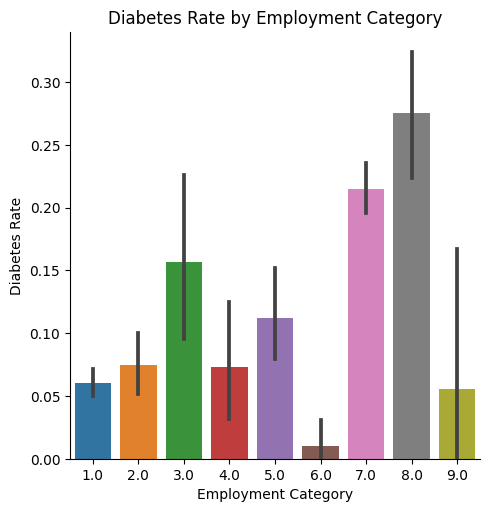

In [60]:
# EMPLOY1
sns.catplot(x="EMPLOY1", y="DIABETE_SIMP", data=tmp_df, kind="bar")
plt.title("Diabetes Rate by Employment Category")
plt.xlabel("Employment Category")
plt.ylabel("Diabetes Rate")
plt.show()

There's clearly an effect at play here.  Each category of employment is complete independent.  Category `'6.0'` makes sense because students are generally young.  Likewise, category `'8.0'` makes sense because disability is one of the primary reasons for a person to be unable to work and diabetes can be a disabling condition.  

#### **Variable:** `'GENHLTH'`

"Would you say that in general your health is:" [Question about general health]

**Possible Responses:**
- 1 - Excellent
- 2 - Very good
- 3 - Good
- 4 - Fair
- 5 - Poor
- 7 - Don't know/Not Sure
- 9 - Refused

In [61]:
# GENHLTH counts
give_counts(tmp_df, "GENHLTH")

Counts for 'GENHLTH' are as follows:
The number of people who answered 1.0 for 'GENHLTH' is 831.
The number of people who answered 2.0 for 'GENHLTH' is 1528.
The number of people who answered 3.0 for 'GENHLTH' is 1368.
The number of people who answered 4.0 for 'GENHLTH' is 626.
The number of people who answered 5.0 for 'GENHLTH' is 225.
The number of people who answered 7.0 for 'GENHLTH' is 6.
The number of people who did not answer for 'GENHLTH' is 0.
The total number of entries is 4584.


Creating a temporary DataFrame and dropping those people who don't know or refused to answer.

In [62]:
# temporary df
tmp_df_6 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_6))

# dropping
tmp_df_6 = tmp_df_6[~(tmp_df_6.GENHLTH >= 7.0)]

# reset the index
tmp_df_6.reset_index(inplace=True)
print("After dropping:", len(tmp_df_6))

Before dropping: 4584
After dropping: 4578


Plot it!

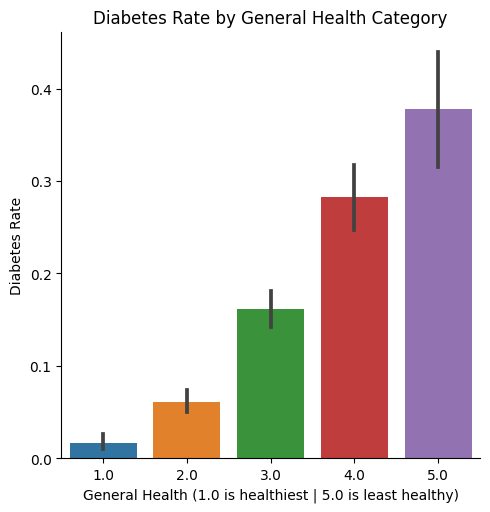

In [63]:
# GENHLTH
sns.catplot(x="GENHLTH", y="DIABETE_SIMP", data=tmp_df_6, kind="bar")
plt.title("Diabetes Rate by General Health Category")
plt.xlabel("General Health (1.0 is healthiest | 5.0 is least healthy)")
plt.ylabel("Diabetes Rate")
plt.show()

This shows a clear and linear increase in the risk of diabetes as one moves up `'GENHLTH'` categories (get's unhealthier).  This is the stuff we like to see when trying to determine which variables are most highly associated with developing diabetes.

In [64]:
# Pass tmp_df_6 back into tmp_df
tmp_df = tmp_df_6[:].copy()

In [65]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)

#### **Let's take a quick check-in with our plots**

In [66]:
tmp_df.columns

Index(['DIABETE3', 'NUMADULT', 'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6',
       'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY',
       'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE',
       'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT',
       'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3',
       'DIABETE_SIMP', 'WEIGHT2', 'WEIGHT2_CAT', 'WEIGHT2_CAT2',
       'CHILDREN_SIMP_2'],
      dtype='object')

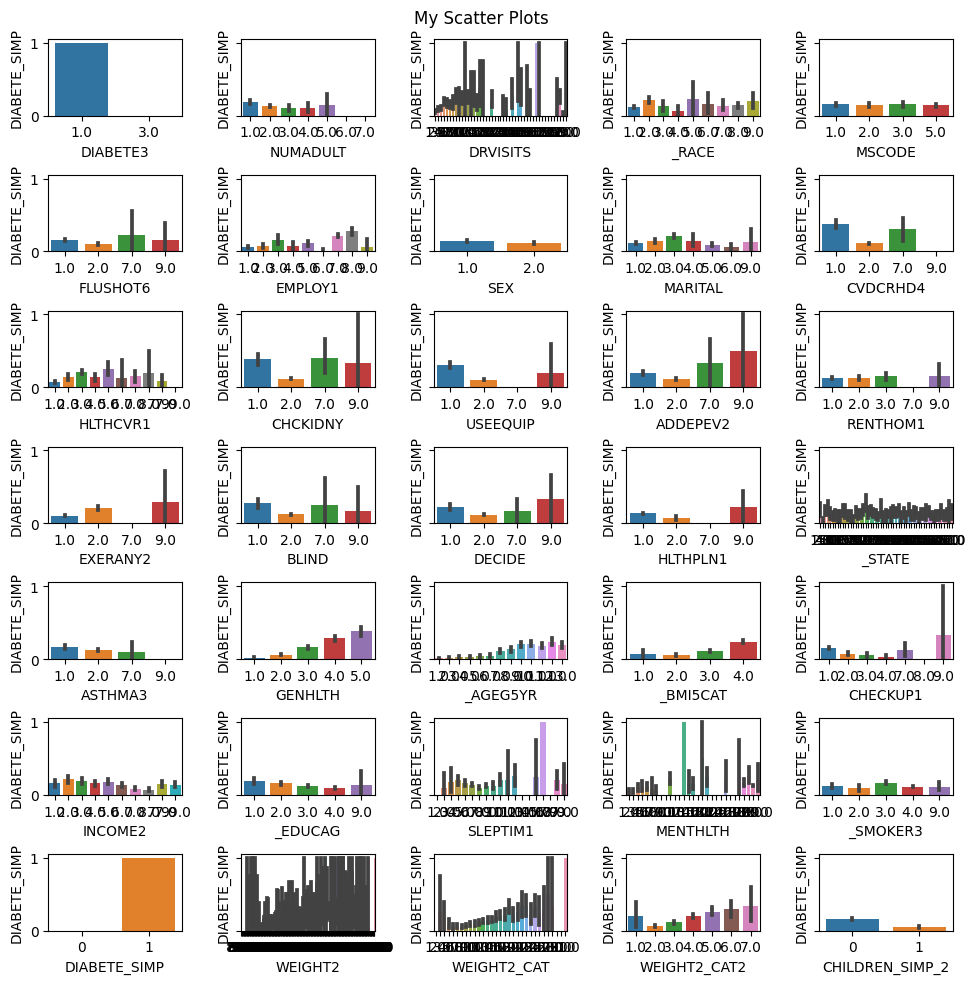

In [67]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(tmp_df.columns[:]):
  if i <= 4:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

Some marginal improvement across the variables we have looked at so far.  Let's keep it going!

Let's save our `tmp_df` to a `.csv` file, we've done some good pruning already.  

In [68]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
tmp_df.to_csv("drive/My Drive/Diabetes Risk Factors/diabetes_data_post_visualization.csv", index=False)

### Dealing With Missing Data:

In the following code we will look at our variables and decide which are worth filling, which we should drop, and justify how we are doing so.  Let's start by recalling our complete dataframe and adding up our missing values.

In [3]:
# dataframe
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/diabetes_data_post_visualization.csv")

# sum missing data
df.isna().sum()

DIABETE3              0
NUMADULT           1620
DRVISITS           1319
_RACE                 2
MSCODE             1668
FLUSHOT6            151
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1539
CHCKIDNY              0
USEEQUIP             89
ADDEPEV2              0
RENTHOM1             37
EXERANY2              0
BLIND                96
DECIDE               96
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

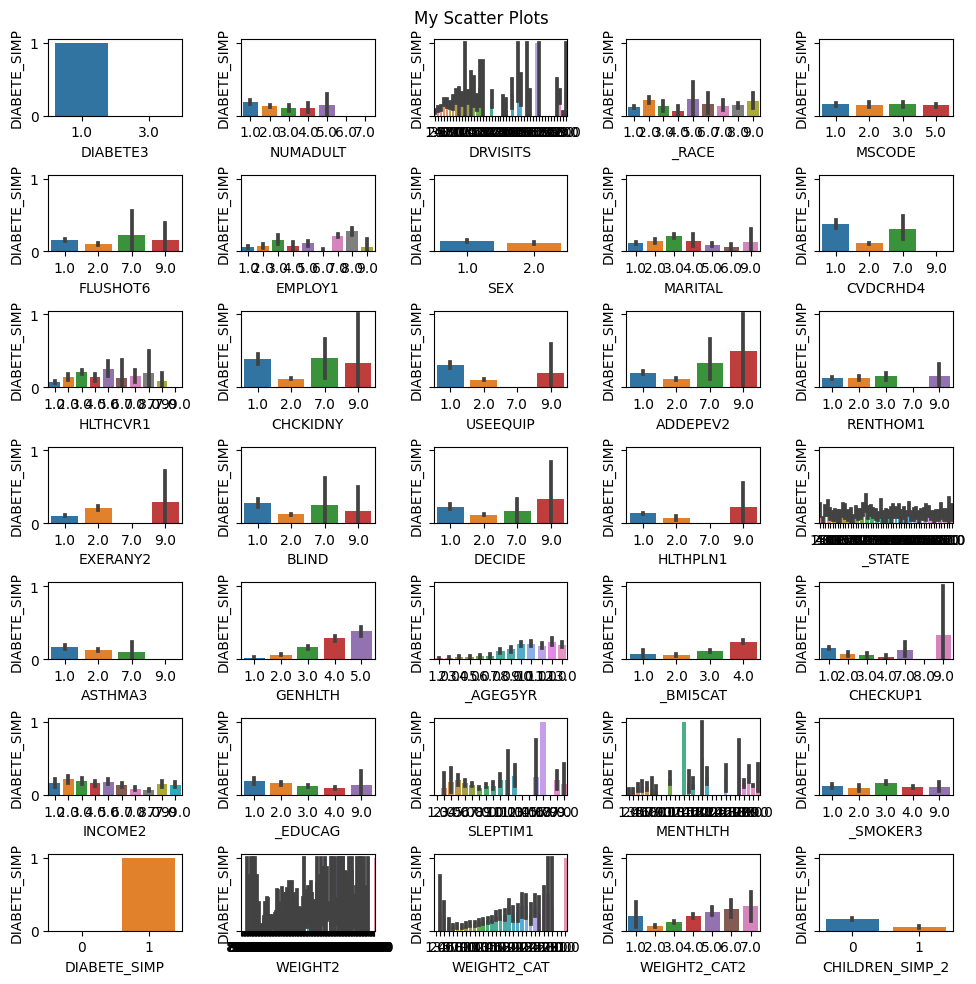

In [4]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(df.columns[:]):
  if i <= 4:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

#### **Variable:** `'_RACE'`

**Categorical variable**

"Race/ethnicity categories"

**Variable Responses:**

- 1 - White only, non-Hispanic

- 2 - Black only, non-Hispanic

- 3 - American Indian or Alaskan Native only, Non-Hispanic

- 4 - Asian only, non-Hispanic

- 5 - Native Hawaiian or other Pacific Islander only, Non-Hispanic

- 6 - Other race only, non-Hispanic

- 7 - Multiracial, non-Hispanic

- 8 - Hispanic

- 9 - Don't know/Not sure/Refused


In [5]:
# _RACE counts
give_counts(df, "_RACE")

Counts for '_RACE' are as follows:
The number of people who answered 1.0 for '_RACE' is 3555.
The number of people who answered 2.0 for '_RACE' is 329.
The number of people who answered 3.0 for '_RACE' is 79.
The number of people who answered 4.0 for '_RACE' is 78.
The number of people who answered 5.0 for '_RACE' is 13.
The number of people who answered 6.0 for '_RACE' is 26.
The number of people who answered 7.0 for '_RACE' is 96.
The number of people who answered 8.0 for '_RACE' is 335.
The number of people who answered 9.0 for '_RACE' is 65.
The number of people who did not answer for '_RACE' is 2.
The total number of entries is 4578.


**Drop Rationale**

Since we are only missing two entries for `'_RACE'`, we think it better to drop the missing values instead of trying to guess.  

In [6]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in _RACE column
df = df[(df._RACE > 0)]

# after dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4578
After dropping: 4576



DIABETE3              0
NUMADULT           1618
DRVISITS           1319
_RACE                 0
MSCODE             1666
FLUSHOT6            151
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1539
CHCKIDNY              0
USEEQUIP             89
ADDEPEV2              0
RENTHOM1             37
EXERANY2              0
BLIND                96
DECIDE               96
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

#### **Variable:** `'BLIND'`

**Categorical variable**

"Are you blind or do you have serious difficulty seeing, even when wearing glasses?"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [7]:
# BLIND counts
give_counts(df, "BLIND")

Counts for 'BLIND' are as follows:
The number of people who answered 1.0 for 'BLIND' is 224.
The number of people who answered 2.0 for 'BLIND' is 4242.
The number of people who answered 7.0 for 'BLIND' is 8.
The number of people who answered 9.0 for 'BLIND' is 6.
The number of people who did not answer for 'BLIND' is 96.
The total number of entries is 4576.


**Drop Rationale**

Since we are only missing 96 entries for `'BLIND'` and we still have a DataFrame with 4500+ rows, we again think it better to drop the missing values instead of trying to guess.  We were slightly torn about this, but there didn't seem to be a reliable enough marker to justify marking some of these yes, and some no.  We are also going to drop the 7.0 and 9.0 answers as there aren't enough entries to train our model anyway.  

In [8]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in BLIND column
df = df[(df.BLIND > 0)]

# drop rows with 7.0 and 9.0 values in BLIND column
df = df[(df.BLIND < 3.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4576
After dropping: 4466



DIABETE3              0
NUMADULT           1575
DRVISITS           1289
_RACE                 0
MSCODE             1623
FLUSHOT6             54
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1498
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

Conveniently, dropping all the missing entries for `'BLIND'` also eliminated the all the rows with missing entries from `'USEEQUIP'` and `'DECIDE'`.

#### **Variable:** `'DECIDE'`

**Categorical variable**

"Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [9]:
# DECIDE counts
give_counts(df, "DECIDE")

Counts for 'DECIDE' are as follows:
The number of people who answered 1.0 for 'DECIDE' is 439.
The number of people who answered 2.0 for 'DECIDE' is 4006.
The number of people who answered 9.0 for 'DECIDE' is 3.
The number of people who answered 7.0 for 'DECIDE' is 18.
The number of people who did not answer for 'DECIDE' is 0.
The total number of entries is 4466.


**Drop Rationale**

Entries of 7.0 and 9.0 aren't numerous enough to keep for `'DECIDE'` so we are going to drop the rows containing these values.



In [10]:
# before dropping
print("Before dropping:", len(df))

# drop rows with 7.0 and 9.0 values in DECIDE column
df = df[(df.DECIDE < 3.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4466
After dropping: 4445



DIABETE3              0
NUMADULT           1569
DRVISITS           1279
_RACE                 0
MSCODE             1617
FLUSHOT6             52
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1488
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

#### **Variable:** `'FLUSHOT6'`

**Categorical variable**

"During the past 12 months, have you had either a flu shot or a flu vaccine that was sprayed in your nose? (A new flu shot came out in 2011 that injects vaccine into the skin with a very small needle. It is called Fluzone Intradermal vaccine. This is also considered a flu shot.)"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [11]:
# FLUSHOT6 counts
give_counts(df, "FLUSHOT6")

Counts for 'FLUSHOT6' are as follows:
The number of people who answered 1.0 for 'FLUSHOT6' is 2066.
The number of people who answered 2.0 for 'FLUSHOT6' is 2308.
The number of people who answered 7.0 for 'FLUSHOT6' is 9.
The number of people who answered 9.0 for 'FLUSHOT6' is 10.
The number of people who did not answer for 'FLUSHOT6' is 52.
The total number of entries is 4445.


**Drop Rationale**

Since we are only missing 52 entries for `'FLUSHOT6'` and a median wouldn't really make too much sense here, we are going to drop rows containing said missing entries.  We are also going to drop 7.0 and 9.0 entries as there are far too few for our model to make use of.

In [12]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in FLUSHOT6 column
df = df[(df.FLUSHOT6 > 0)]

# drop rows with 7.0 and 9.0 values in FLUSHOT6 column
df = df[(df.FLUSHOT6 < 3.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4445
After dropping: 4374



DIABETE3              0
NUMADULT           1539
DRVISITS           1253
_RACE                 0
MSCODE             1587
FLUSHOT6              0
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1459
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

#### **Variable:** `'RENTHOM1'`

**Categorical variable**

"Do you own or rent your home? (Home is defined as the place where you live most of the time/the majority of the year.)"

**Possible Responses:**
- 1 - Own
- 2 - Rent
- 3 - Other arrangement
- 7 - Don't know/Not Sure
- 9 - Refused

In [13]:
# RENTHOM1 counts
give_counts(df, "RENTHOM1")

Counts for 'RENTHOM1' are as follows:
The number of people who answered 1.0 for 'RENTHOM1' is 3281.
The number of people who answered 2.0 for 'RENTHOM1' is 883.
The number of people who answered 3.0 for 'RENTHOM1' is 191.
The number of people who answered 7.0 for 'RENTHOM1' is 7.
The number of people who answered 9.0 for 'RENTHOM1' is 12.
The number of people who did not answer for 'RENTHOM1' is 0.
The total number of entries is 4374.


**Drop Rationale**

We are going to drop the 7.0 and 9.0 entries of `'RENTHOM1'` as there are too few for our model to learn on.  

In [14]:
# # Filling code
# df['RENTHOM1'] = df['RENTHOM1'].fillna(df.groupby('INCOME2')['RENTHOM1'].transform('median'))

# # sum missing data
# df.isna().sum()

# before dropping
print("Before dropping:", len(df))

# drop rows with 7.0 and 9.0 values in FLUSHOT6 column
df = df[(df.RENTHOM1 < 4.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4374
After dropping: 4355



DIABETE3              0
NUMADULT           1532
DRVISITS           1246
_RACE                 0
MSCODE             1580
FLUSHOT6              0
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1450
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
dtype: int64

#### **Variable:** `'DRVISITS'`

**Numeric variable**

"How many times have you been to a doctor, nurse, or other health professional in the past 12 months?"

**Possible responses:**
- 1 - 76 - Number of times
- 88 - None
- 77 - Dont know/Not Sure

In [15]:
# DRVISITS counts
give_counts(df, "DRVISITS")

Counts for 'DRVISITS' are as follows:
The number of people who answered 1.0 for 'DRVISITS' is 494.
The number of people who answered 2.0 for 'DRVISITS' is 527.
The number of people who answered 3.0 for 'DRVISITS' is 380.
The number of people who answered 4.0 for 'DRVISITS' is 347.
The number of people who answered 5.0 for 'DRVISITS' is 175.
The number of people who answered 6.0 for 'DRVISITS' is 226.
The number of people who answered 7.0 for 'DRVISITS' is 58.
The number of people who answered 8.0 for 'DRVISITS' is 78.
The number of people who answered 9.0 for 'DRVISITS' is 16.
The number of people who answered 10.0 for 'DRVISITS' is 102.
The number of people who answered 11.0 for 'DRVISITS' is 3.
The number of people who answered 12.0 for 'DRVISITS' is 110.
The number of people who answered 13.0 for 'DRVISITS' is 5.
The number of people who answered 14.0 for 'DRVISITS' is 15.
The number of people who answered 15.0 for 'DRVISITS' is 41.
The number of people who answered 16.0 for 'DRVISI

With so many missing entries (1246) it might not be the best idea to try to fill the missing data.  Let's take a quick look at the current significance of this variable before we decide.  

In [16]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2            0.001578
HLTHCVR1           0.001918
RENTHOM1           0.008306
MARITAL            0.010029
MSCODE             0.010354
_SMOKER3           0.010668
_STATE             0.013464
HLTHPLN1           0.019484
SLEPTIM1           0.020330
DRVISITS           0.027140
SEX                0.031279
MENTHLTH           0.031713
ASTHMA3            0.032042
_RACE              0.034055
CHCKIDNY           0.037761
CVDCRHD4           0.048268
ADDEPEV2           0.065158
FLUSHOT6           0.070483
NUMADULT           0.077819
_EDUCAG            0.078428
DECIDE             0.096008
BLIND              0.097272
CHECKUP1           0.108201
EXERANY2           0.117787
CHILDREN_SIMP_2    0.149333
USEEQUIP           0.170355
WEIGHT2_CAT2       0.182433
WEIGHT2_CAT        0.191077
WEIGHT2            0.191319
_BMI5CAT           0.216078
EMPLOY1            0.217988
_AGEG5YR           0.223440
GENHLTH            0.300961
DIABETE3           1.000000
DIABETE_SIMP       1.000000
Name: DIABETE_SIMP, 

**Can we make it a more reliable variable?**

In [17]:
# reset the index
df.reset_index(inplace=True)

In [18]:
# transform the DRVISITS variable
li1 = df["DRVISITS"]
li2 = []

for i in range(len(li1)):
  if li1[i] <= 88.0:
    if li1[i] == 88.0:
      li2.append(0.0)
    elif li1[i] == 77.0:
      li2.append(77.0)
    elif li1[i] < 77.0 and li1[i] >= 11.0:
      li2.append(11.0)
    else:
      li2.append(li1[i])
  else:
    li2.append(li1[i])

#df.drop("DRVISITS", axis=1, inplace=True)
df["DRVISITS_SIMP"] = li2

In [20]:
# drop index
df.drop("index", axis=1, inplace=True)

In [21]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2            0.001578
HLTHCVR1           0.001918
RENTHOM1           0.008306
MARITAL            0.010029
MSCODE             0.010354
_SMOKER3           0.010668
_STATE             0.013464
HLTHPLN1           0.019484
SLEPTIM1           0.020330
DRVISITS           0.027140
SEX                0.031279
MENTHLTH           0.031713
ASTHMA3            0.032042
_RACE              0.034055
CHCKIDNY           0.037761
CVDCRHD4           0.048268
ADDEPEV2           0.065158
FLUSHOT6           0.070483
NUMADULT           0.077819
_EDUCAG            0.078428
DECIDE             0.096008
BLIND              0.097272
CHECKUP1           0.108201
EXERANY2           0.117787
DRVISITS_SIMP      0.121576
CHILDREN_SIMP_2    0.149333
USEEQUIP           0.170355
WEIGHT2_CAT2       0.182433
WEIGHT2_CAT        0.191077
WEIGHT2            0.191319
_BMI5CAT           0.216078
EMPLOY1            0.217988
_AGEG5YR           0.223440
GENHLTH            0.300961
DIABETE3           1.000000
DIABETE_SIMP       1

Clearly our refinement has increased the explanatory power of the initial variable.  

In [22]:
# DRVISITS_SIMP counts
give_counts(df, "DRVISITS_SIMP")

Counts for 'DRVISITS_SIMP' are as follows:
The number of people who answered 0.0 for 'DRVISITS_SIMP' is 289.
The number of people who answered 1.0 for 'DRVISITS_SIMP' is 494.
The number of people who answered 2.0 for 'DRVISITS_SIMP' is 527.
The number of people who answered 3.0 for 'DRVISITS_SIMP' is 380.
The number of people who answered 4.0 for 'DRVISITS_SIMP' is 347.
The number of people who answered 5.0 for 'DRVISITS_SIMP' is 175.
The number of people who answered 6.0 for 'DRVISITS_SIMP' is 226.
The number of people who answered 7.0 for 'DRVISITS_SIMP' is 58.
The number of people who answered 8.0 for 'DRVISITS_SIMP' is 78.
The number of people who answered 9.0 for 'DRVISITS_SIMP' is 16.
The number of people who answered 10.0 for 'DRVISITS_SIMP' is 102.
The number of people who answered 11.0 for 'DRVISITS_SIMP' is 341.
The number of people who answered 77.0 for 'DRVISITS_SIMP' is 73.
The number of people who answered 99.0 for 'DRVISITS_SIMP' is 3.
The number of people who did not an

**Quick Visualization**

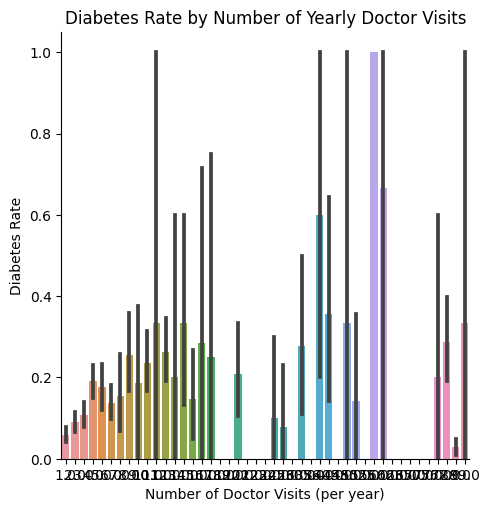

In [23]:
# DRVISITS
sns.catplot(x="DRVISITS", y="DIABETE_SIMP", data=df, kind="bar")
plt.title("Diabetes Rate by Number of Yearly Doctor Visits")
plt.xlabel("Number of Doctor Visits (per year)")
plt.ylabel("Diabetes Rate")
plt.show()

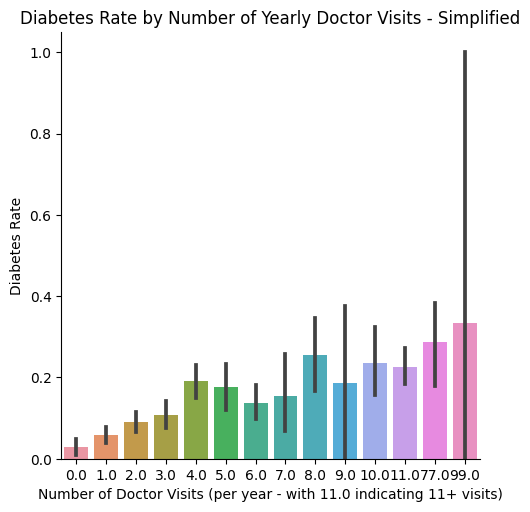

In [24]:
# DRVISITS_SIMP
sns.catplot(x="DRVISITS_SIMP", y="DIABETE_SIMP", data=df, kind="bar")
plt.title("Diabetes Rate by Number of Yearly Doctor Visits - Simplified")
plt.xlabel("Number of Doctor Visits (per year - with 11.0 indicating 11+ visits)")
plt.ylabel("Diabetes Rate")
plt.show()

Let's now drop the 3 entries for 99.0 (Refused to answer) as the variability with so few entries is insurmountable.  We will leave 9.0 in as an option because we don't want an arbitrary hole in our data.  

In [25]:
# before dropping
print("Before dropping:", len(df))

# drop rows with 99.0 entries
df = df[~(df.DRVISITS_SIMP > 90.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4355
After dropping: 4352



DIABETE3              0
NUMADULT           1530
DRVISITS           1246
_RACE                 0
MSCODE             1578
FLUSHOT6              0
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1450
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
DRVISITS_SIMP      1246
dtype: int64

With a correlation of `0.121576`, this variable has become too important to drop instead of trying to fill it.  Let's fill our missing values with the median value of our 0.0 to 11.0 entries.  

In [41]:
# find median
index = (len(np.where((df.DRVISITS_SIMP >= 0.0) & (df.DRVISITS_SIMP <= 11.0))[0]) // 2)
med = (df.DRVISITS_SIMP)[index]

print(f"The median value of this set is {med}")

# Filling code - by median of entries 0.0 through 11.0
df['DRVISITS_SIMP'].fillna(med, inplace=True)

The median value of this set is 3.0


Checking...

In [42]:
# DRVISITS counts
give_counts(df, "DRVISITS_SIMP")

Counts for 'DRVISITS_SIMP' are as follows:
The number of people who answered 0.0 for 'DRVISITS_SIMP' is 289.
The number of people who answered 1.0 for 'DRVISITS_SIMP' is 494.
The number of people who answered 2.0 for 'DRVISITS_SIMP' is 527.
The number of people who answered 3.0 for 'DRVISITS_SIMP' is 1626.
The number of people who answered 4.0 for 'DRVISITS_SIMP' is 347.
The number of people who answered 5.0 for 'DRVISITS_SIMP' is 175.
The number of people who answered 6.0 for 'DRVISITS_SIMP' is 226.
The number of people who answered 7.0 for 'DRVISITS_SIMP' is 58.
The number of people who answered 8.0 for 'DRVISITS_SIMP' is 78.
The number of people who answered 9.0 for 'DRVISITS_SIMP' is 16.
The number of people who answered 10.0 for 'DRVISITS_SIMP' is 102.
The number of people who answered 11.0 for 'DRVISITS_SIMP' is 341.
The number of people who answered 77.0 for 'DRVISITS_SIMP' is 73.
The number of people who did not answer for 'DRVISITS_SIMP' is 0.
The total number of entries is 43

In [43]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2            0.000266
HLTHCVR1           0.001901
RENTHOM1           0.008875
MARITAL            0.009934
_SMOKER3           0.010949
MSCODE             0.011441
_STATE             0.013862
HLTHPLN1           0.019421
SLEPTIM1           0.020356
DRVISITS           0.029105
MENTHLTH           0.031322
SEX                0.031672
ASTHMA3            0.032158
_RACE              0.034262
CHCKIDNY           0.037811
CVDCRHD4           0.048502
ADDEPEV2           0.065582
FLUSHOT6           0.070956
NUMADULT           0.077066
_EDUCAG            0.078027
DECIDE             0.096227
BLIND              0.097447
DRVISITS_SIMP      0.102361
CHECKUP1           0.108100
EXERANY2           0.117091
CHILDREN_SIMP_2    0.148905
USEEQUIP           0.169485
WEIGHT2_CAT2       0.182617
WEIGHT2_CAT        0.191352
WEIGHT2            0.191501
_BMI5CAT           0.215685
EMPLOY1            0.217854
_AGEG5YR           0.222810
GENHLTH            0.301518
DIABETE_SIMP       1.000000
DIABETE3           1

While the `'DRVISITS_SIMP'` did lose some of it's correlation, that was to be expected when extrapolating so many missing entries.  The benefit is that it is still a far better variable than it began and it is now easily digestible for our model.  Let's go ahead and drop the original `'DRVISITS'` variable and check our other missing entries.  

In [44]:
# dropping
df.drop("DRVISITS", axis=1, inplace=True)

# remaining na
df.isna().sum()

DIABETE3              0
NUMADULT           1530
_RACE                 0
MSCODE             1578
FLUSHOT6              0
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
HLTHCVR1           1450
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
MENTHLTH              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2               0
WEIGHT2_CAT           0
WEIGHT2_CAT2          0
CHILDREN_SIMP_2       0
DRVISITS_SIMP         0
dtype: int64

#### **Variable:** `'HLTHCVR1'`

**Categorical variable**

"What is the primary source of your health care coverage? Is it…"

**Possible responses:**
- 1 - A plan purchased through an employer or union -
Notes: includes plans purchased through another person's employer
- 2 - A plan that you or another family member buys on your own
- 3 - Medicare
- 4 - Medicaid or other state program
- 5 - TRICARE (formerly CHAMPUS), VA, or Military
- 6 - Alaska Native, Indian Health Service, Tribal Health Services
- 7 - Some other source
- 8 - None (no coverage)
- 77 - Don't know/Not Sure
- 99 - Refused

In [45]:
# HLTHCVR1 counts
give_counts(df, "HLTHCVR1")

Counts for 'HLTHCVR1' are as follows:
The number of people who answered 1.0 for 'HLTHCVR1' is 1343.
The number of people who answered 2.0 for 'HLTHCVR1' is 300.
The number of people who answered 3.0 for 'HLTHCVR1' is 851.
The number of people who answered 4.0 for 'HLTHCVR1' is 197.
The number of people who answered 5.0 for 'HLTHCVR1' is 82.
The number of people who answered 6.0 for 'HLTHCVR1' is 7.
The number of people who answered 7.0 for 'HLTHCVR1' is 73.
The number of people who answered 8.0 for 'HLTHCVR1' is 9.
The number of people who answered 77.0 for 'HLTHCVR1' is 33.
The number of people who answered 99.0 for 'HLTHCVR1' is 7.
The number of people who did not answer for 'HLTHCVR1' is 1450.
The total number of entries is 4352.


**Dump the column rationale**

We are missing 1450 entries for `'HLTHCVR1'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE3'` variable of just `0.001901` (as seen in the above `'DRVISITS'` section), there's not much potential in adding a bunch of extrapolated data to this one column.  

Additionally in this case, `'HLTHPLN1'` is a very similar yes/no variable that probably captures at least some of the effect that `'HLTHCVR1'` captures.

In [46]:
# dropping
df.drop("HLTHCVR1", axis=1, inplace=True)

#### **Variable:** `'MSCODE'`

**Categorical variable**

"Metropolitan Status Code"

**Possible responses:**
- 1 - In the center city of an MSA
- 2 - Outside the center city of an MSA but inside the county containing the center city
- 3 - Inside a suburban county of the MSA
- 5 - Not in an MSA

In [47]:
# MSCODE counts
give_counts(df, "MSCODE")

Counts for 'MSCODE' are as follows:
The number of people who answered 1.0 for 'MSCODE' is 897.
The number of people who answered 2.0 for 'MSCODE' is 477.
The number of people who answered 3.0 for 'MSCODE' is 424.
The number of people who answered 5.0 for 'MSCODE' is 976.
The number of people who did not answer for 'MSCODE' is 1578.
The total number of entries is 4352.


**Dump the column rationale**

We are missing 1578 entries for `'MSCODE'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE_SIMP'` variable of just `0.011441` (as seen in the `'DRVISITS'` section), there's not much potential in adding a bunch of extrapolated data to this one column.  

In [48]:
# dropping
df.drop("MSCODE", axis=1, inplace=True)

#### **Variable:** `'NUMADULT'` -- REVISIT THIS

**Numeric variable**

"Number of Adults in Household"

**Variable Responses:**

- 1 to 99 - Number of adults in the household

In [49]:
# NUMADULT counts
give_counts(df, "NUMADULT")

Counts for 'NUMADULT' are as follows:
The number of people who answered 1.0 for 'NUMADULT' is 1052.
The number of people who answered 2.0 for 'NUMADULT' is 1436.
The number of people who answered 3.0 for 'NUMADULT' is 228.
The number of people who answered 4.0 for 'NUMADULT' is 80.
The number of people who answered 5.0 for 'NUMADULT' is 20.
The number of people who answered 6.0 for 'NUMADULT' is 5.
The number of people who answered 7.0 for 'NUMADULT' is 1.
The number of people who did not answer for 'NUMADULT' is 1530.
The total number of entries is 4352.


**Dump the column rationale**

We are missing 1530 entries for `'NUMADULT'`.

Unless we are going to use a model that is robust against missing values, we should dump this column. With a correlation to the `'DIABETE3_SIMP'` variable of just `0.077066` (as seen in the `'DRVISITS'` section), there may be some potential to adding a bunch of extrapolated data to this one column, but assuming two adults (the obvious median of the variable) for this many entries seems irresponsible.

We will revisit the idea of dropping this column when we chose our model.  Perhaps we will switch tactics and fill instead.


#### Saving a copy of our trimmed down DataFrame

In [50]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv", index=False)

### Rescaling/Adjusting Variables

Initialize the DataFrame

In [51]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DIABETE3         4352 non-null   float64
 1   NUMADULT         2822 non-null   float64
 2   _RACE            4352 non-null   float64
 3   FLUSHOT6         4352 non-null   float64
 4   EMPLOY1          4352 non-null   float64
 5   SEX              4352 non-null   float64
 6   MARITAL          4352 non-null   float64
 7   CVDCRHD4         4352 non-null   float64
 8   CHCKIDNY         4352 non-null   float64
 9   USEEQUIP         4352 non-null   float64
 10  ADDEPEV2         4352 non-null   float64
 11  RENTHOM1         4352 non-null   float64
 12  EXERANY2         4352 non-null   float64
 13  BLIND            4352 non-null   float64
 14  DECIDE           4352 non-null   float64
 15  HLTHPLN1         4352 non-null   float64
 16  _STATE           4352 non-null   float64
 17  ASTHMA3       

Reminder of how our variables are looking.

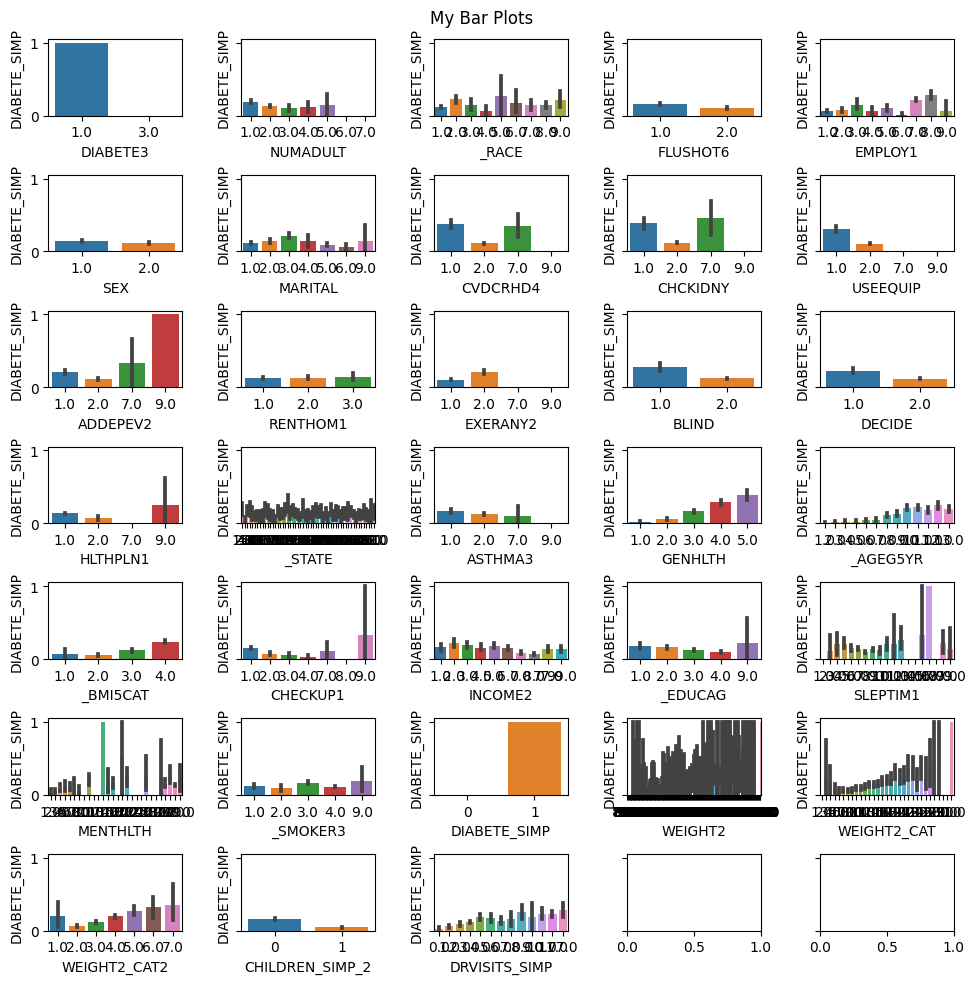

In [52]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(df.columns[:]):
  if i <= 4:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=df[col], y=df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Bar Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

Note how most of the variables with a 7.0 or 9.0 category have so much variability in these categories as to be nearly useless.  In some cases, this hardly matters as the variability in the other categories is nearly as bad, but in some cases, we think our analysis could improve if we dropped or reshaped data with lots of variance.  

#### **Variable:** `'MENTHLTH'`

**Numeric variable**

"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"

**Possible responses:**
- 1 to 30 - "Number of days"
- 77 - "Don't know/Not sure"
- 88 - "None"
- 99 - "Refused"

We are going to convert all `'88.0'` entries into `'0.0'` entries and drop those responses that give us no data.

**New responses:**
- 0 to 30 - "Number of days" (includes "None")


In [ ]:
# MENTHLTH counts
give_counts(df, "MENTHLTH")

Counts for 'MENTHLTH' are as follows:
The number of people who answered 1.0 for 'MENTHLTH' is 137.
The number of people who answered 2.0 for 'MENTHLTH' is 197.
The number of people who answered 3.0 for 'MENTHLTH' is 132.
The number of people who answered 4.0 for 'MENTHLTH' is 61.
The number of people who answered 5.0 for 'MENTHLTH' is 152.
The number of people who answered 6.0 for 'MENTHLTH' is 13.
The number of people who answered 7.0 for 'MENTHLTH' is 59.
The number of people who answered 8.0 for 'MENTHLTH' is 13.
The number of people who answered 10.0 for 'MENTHLTH' is 107.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 23.
The number of people who answered 15.0 for 'MENTHLTH' is 95.
The number of people who answered 16.0 for 'MENTHLTH' is 1.
The number of people who answered 18.0 for 'MENTHLTH'

In [ ]:
# transform the MENTHLTH variable
li1 = df["MENTHLTH"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("MENTHLTH", axis=1, inplace=True)
df["MENTHLTH"] = li2

In [ ]:
# MENTHLTH counts
give_counts(df, "MENTHLTH")

Counts for 'MENTHLTH' are as follows:
The number of people who answered 0.0 for 'MENTHLTH' is 3045.
The number of people who answered 1.0 for 'MENTHLTH' is 137.
The number of people who answered 2.0 for 'MENTHLTH' is 197.
The number of people who answered 3.0 for 'MENTHLTH' is 132.
The number of people who answered 4.0 for 'MENTHLTH' is 61.
The number of people who answered 5.0 for 'MENTHLTH' is 152.
The number of people who answered 6.0 for 'MENTHLTH' is 13.
The number of people who answered 7.0 for 'MENTHLTH' is 59.
The number of people who answered 8.0 for 'MENTHLTH' is 13.
The number of people who answered 10.0 for 'MENTHLTH' is 107.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 23.
The number of people who answered 15.0 for 'MENTHLTH' is 95.
The number of people who answered 16.0 for 'MENTHLT

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in MENTHLTH column
df = df[~(df.MENTHLTH >= 77.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4425
After dropping: 4351



DIABETE3              0
NUMADULT           1531
_RACE                 0
FLUSHOT6              0
EMPLOY1               0
SEX                   0
MARITAL               0
CVDCRHD4              0
CHCKIDNY              0
USEEQUIP              0
ADDEPEV2              0
RENTHOM1              0
EXERANY2              0
BLIND                 0
DECIDE                0
HLTHPLN1              0
_STATE                0
ASTHMA3               0
GENHLTH               0
_AGEG5YR              0
_BMI5CAT              0
CHECKUP1              0
INCOME2               0
_EDUCAG               0
SLEPTIM1              0
_SMOKER3              0
DIABETE_SIMP          0
WEIGHT2_CAT           0
CHILDREN_SIMP_2       0
MENTHLTH              0
dtype: int64

Plot `'DIABETE_SIMP'` against `'MENTHLTH'`:

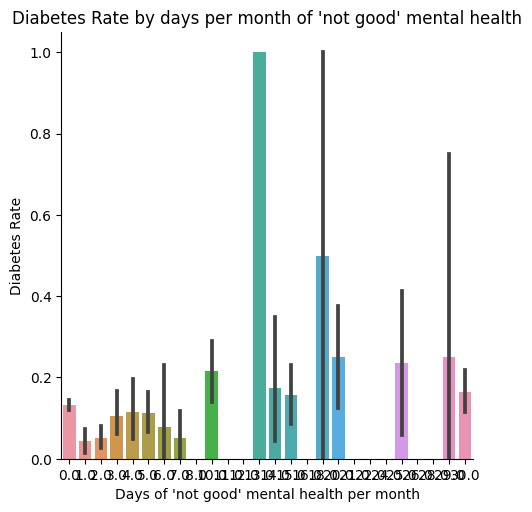

In [ ]:
# MENTHLTH
sns.catplot(x="MENTHLTH", y="DIABETE_SIMP", data=df, kind="bar")
plt.title("Diabetes Rate by days per month of 'not good' mental health")
plt.xlabel("Days of 'not good' mental health per month")
plt.ylabel("Diabetes Rate")
plt.show()

There's lots of variability here, and from our earlier counts, there was clear clumping of responses on days divisible by 5.  Let's try creating a variable called `'MENTHLTH_CAT'` that groups the responses to try to eliminate some of the variability and see how that lines up against the original variable.  

In [ ]:
# reset the index
df.reset_index(inplace=True)

# Quick housecleaning
df.drop("index", axis=1, inplace=True)

In [ ]:
# transform the MENTHLTH variable
li1 = df["MENTHLTH"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 0.0 and li1[i] <= 10.0:
    li2.append(1.0)
  elif li1[i] > 10.0 and li1[i] <= 20.0:
    li2.append(2.0)
  elif li1[i] > 20.0 and li1[i] <= 30.0:
    li2.append(3.0)
  else:
    li2.append(li1[i])

df["MENTHLTH_CAT"] = li2

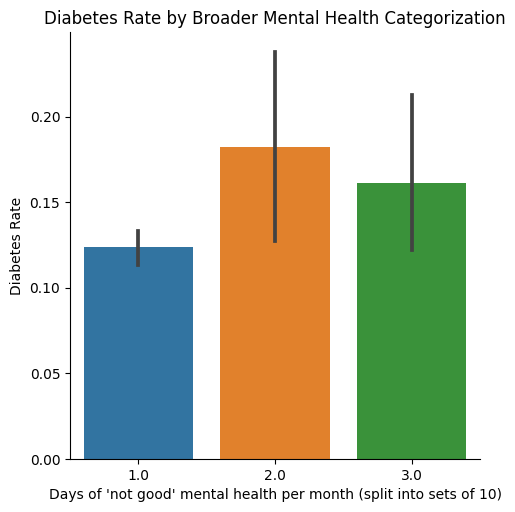

In [ ]:
# MENTHLTH_CAT
sns.catplot(x="MENTHLTH_CAT", y="DIABETE_SIMP", data=df, kind="bar")
plt.title("Diabetes Rate by Broader Mental Health Categorization")
plt.xlabel("Days of 'not good' mental health per month (split into sets of 10)")
plt.ylabel("Diabetes Rate")
plt.show()

This data has far less variability, if also no linearity.  Let's see how the `'MENTHLTH_CAT'` variable ranks with the `'MENTHLTH'` when looking at correlation with `'DIABETE_SIMP'`.

In [ ]:
# drop DIABETE3 - We have carried it too far anyway
df.drop("DIABETE3", axis=1, inplace=True)

# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2            0.000829
RENTHOM1           0.001961
_SMOKER3           0.004959
SLEPTIM1           0.007080
_STATE             0.009422
MARITAL            0.009424
CHCKIDNY           0.028062
ASTHMA3            0.029376
SEX                0.030721
_RACE              0.030769
HLTHPLN1           0.034599
MENTHLTH_CAT       0.036618
MENTHLTH           0.037687
BLIND              0.040226
DECIDE             0.045757
FLUSHOT6           0.046671
CVDCRHD4           0.053440
_EDUCAG            0.076593
NUMADULT           0.077482
ADDEPEV2           0.080280
CHECKUP1           0.108427
EXERANY2           0.110982
USEEQUIP           0.142421
CHILDREN_SIMP_2    0.153658
WEIGHT2_CAT        0.189449
EMPLOY1            0.214154
_BMI5CAT           0.215909
_AGEG5YR           0.225022
GENHLTH            0.297635
DIABETE_SIMP       1.000000
Name: DIABETE_SIMP, dtype: float64

In this case, simplifying the `'MENTHLTH'` variable barely decreased it's correlation when looking at the `'DIABETE_SIMP'` variable but drastically decreased it's variability.  We think this serves as sufficient reasoning to drop the original variable in favor of the more consistent `'MENTHLTH_CAT'` variable.  

In [ ]:
# drop DIABETE3 - We have carried it too far anyway
df.drop("MENTHLTH", axis=1, inplace=True)

In [ ]:
############### Pick it up here

#### Saving a copy of our modified DataFrame

In [ ]:
# Save the modified DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv", index=False)

## Modeling

According to the instructions, we want to "build a model to identify risk factors for diabetes".  This isn't a very specific directive (which seems purposeful).  We have been trying to decide what kind of analysis to run this whole time, but that is very difficult to do without first deciding how to interpret the assignment.

Let's take a quick look at `'DIABETE3'` again below.  

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4659 non-null   int64  
 1   DIABETE3  4659 non-null   float64
 2   NUMADULT  3034 non-null   float64
 3   DRVISITS  3321 non-null   float64
 4   _RACE     4659 non-null   float64
 5   MSCODE    2981 non-null   float64
 6   FLUSHOT6  4659 non-null   float64
 7   EMPLOY1   4659 non-null   float64
 8   SEX       4659 non-null   float64
 9   MARITAL   4659 non-null   float64
 10  CVDCRHD4  4659 non-null   float64
 11  HLTHCVR1  3100 non-null   float64
 12  CHCKIDNY  4659 non-null   float64
 13  USEEQUIP  4659 non-null   float64
 14  ADDEPEV2  4659 non-null   float64
 15  RENTHOM1  4659 non-null   float64
 16  EXERANY2  4659 non-null   float64
 17  BLIND     4659 non-null   float64
 18  DECIDE    4659 non-null   float64
 19  HLTHPLN1  4659 non-null   float64
 20  _STATE    4659 non-null   floa

In [ ]:
# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 3.0 for 'DIABETE3' is 3969.
The number of people who answered 4.0 for 'DIABETE3' is 72.


Part of the difficulty in deciding on our interpretation lies in how the `'DIABETE3'` variable is structured.  It is categorical without truly being ordinal.  There is a 'no' response, a 'yes' response, an 'in between' response (pre-diabetic), and an 'occasionally' response (while female during pregnancy).  Does 'identifying risk factors' mean that we should include the 36 entries for 'females while pregnant?  Would that even be a big enough sample for our model?  Frankly, 72 observations of pre-diabetic folks is barely a large enough sample as it is, so dropping the pregnancy responses is tentatively the right call.  

We see two potential routes to explore.  In our first potential route, we could ditch both of our less definite responses and run a Logistic Regression (or another classification model).  In our second potential route, we could just ditch the pregnancy responses, treat pre-diabetics as a midpoint between diabetics and non-diabetics, and then run an Ordinal Logistic Regression on our now ordinal data.  

We're going to go with a basic Logistic Regression.

In [ ]:
# swap '3.0' to '0.0
li1 = df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 3.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("DIABETE3", axis=1, inplace=True)
df["DIABETE3"] = li2

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

# before dropping
print("\nBefore dropping:", len(df))

# drop rows with values of '2.0' and '4.0' in DIABETE3
df = df[~(df.DIABETE3 == 2.0)]
df = df[~(df.DIABETE3 == 4.0)]


# After dropping
print("After dropping:", len(df))

# sum missing data
df.isna().sum()
print("")

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 4.0 for 'DIABETE3' is 72.

Before dropping: 4659
After dropping: 4551


The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.


### **Logistic Regression**

We are going to do a Logistic Regression and drop the pre-diabetic responses.  Hopefully, the insights garnered from comparing diabetics to non-diabetics will be applicable to the pre-diabetic and diabetic while pregnant folks as well.  

#### **Last Tweaks**

Before we can start our Logistic Regression, we have a few more things to tidy in our data.  We are going to stick with our earlier plan of dropping the rest of the columns with missing data from our data set.  The columns are `'NUMADULT'`, `'DRVISITS'`, `'MSCODE'`, and `'HLTHCVR1'`.  

In [ ]:
# dropping
df.drop("NUMADULT", axis=1, inplace=True)
df.drop("DRVISITS", axis=1, inplace=True)
df.drop("MSCODE", axis=1, inplace=True)
df.drop("HLTHCVR1", axis=1, inplace=True)

We will also drop the non-numeric data from the only strictly numeric variable we are still using, `'CHILDREN'`.

In [ ]:
# CHILDREN count
for i in set(df["CHILDREN"]):
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")

# before dropping
print("Before dropping:", len(df))

# drop rows with values of 99.0 in CHILDREN column
df = df[~(df.CHILDREN == 99.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

The number of people who answered 0.0 for 'CHILDREN' is 3354.
The number of people who answered 1.0 for 'CHILDREN' is 483.
The number of people who answered 2.0 for 'CHILDREN' is 430.
The number of people who answered 3.0 for 'CHILDREN' is 173.
The number of people who answered 4.0 for 'CHILDREN' is 57.
The number of people who answered 99.0 for 'CHILDREN' is 17.
The number of people who answered 5.0 for 'CHILDREN' is 19.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 1.
Before dropping: 4551
After dropping: 4534



PERSONID    0
_RACE       0
FLUSHOT6    0
EMPLOY1     0
SEX         0
MARITAL     0
CVDCRHD4    0
CHCKIDNY    0
USEEQUIP    0
ADDEPEV2    0
RENTHOM1    0
EXERANY2    0
BLIND       0
DECIDE      0
HLTHPLN1    0
_STATE      0
ASTHMA3     0
GENHLTH     0
_AGEG5YR    0
_BMI5CAT    0
CHECKUP1    0
INCOME2     0
_EDUCAG     0
SLEPTIM1    0
_SMOKER3    0
CHILDREN    0
WEIGHT2     0
MENTHLTH    0
DIABETE3    0
dtype: int64

Let's look at one last scatterplot.

In [ ]:
df.columns

Index(['PERSONID', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH', 'DIABETE3'],
      dtype='object')

In [ ]:
neworder = ['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH']

df=df.reindex(columns=neworder)
df.columns

Index(['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1',
       'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3',
       'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG',
       'SLEPTIM1', '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH'],
      dtype='object')

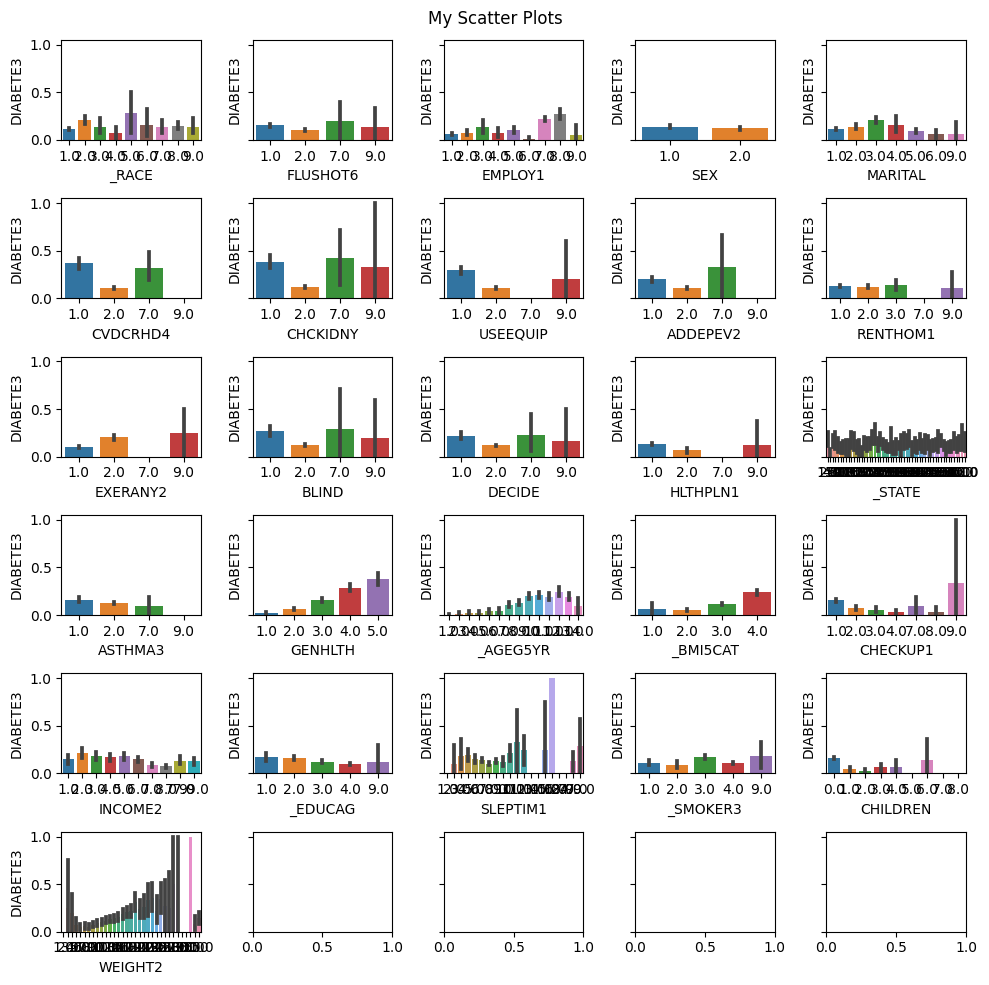

In [ ]:
# plot build
fig, ax = plt.subplots(6, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(df.columns[2:-1]):
  if i <= 4:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[4,i-20])
  else:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[5,i-25])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv", index=False)

#### **Let's set up the Logistic Regression!**

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "complete_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv")

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

df.drop("PERSONID", axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('DIABETE3', axis=1), df['DIABETE3'], test_size=0.2, random_state=42)

# Define the parameter grid for the logistic regression model
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_acc = grid_search.best_score_

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", best_params)
print("Best accuracy score:", best_acc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
print(cm)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best accuracy score: 0.8781366011209271
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Fit model with best parameters

In [ ]:
best_model = LogisticRegression(C= 10, penalty='l2')
best_model.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print('Recall:', recall)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8610804851157663
Recall: 0.8610804851157663
Confusion Matrix:
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Which features play most strongly into diabetes?

In [ ]:
# features
features_dict = dict(zip(X_train.columns, list(best_model.coef_[0])))
features_dict

{'_RACE': 0.05375907516669117,
 'FLUSHOT6': -0.0043670817281044345,
 'EMPLOY1': 0.03775587698946592,
 'SEX': -0.349754399723058,
 'MARITAL': 0.00030000514187183795,
 'CVDCRHD4': -0.4226490403745349,
 'CHCKIDNY': -0.26809135448823707,
 'USEEQUIP': -0.2271835890177115,
 'ADDEPEV2': -0.5198894756509375,
 'RENTHOM1': -0.09375950522461604,
 'EXERANY2': -0.06129270324346257,
 'BLIND': -0.4356339478950831,
 'DECIDE': -0.08033765458478032,
 'HLTHPLN1': -0.4488780658054785,
 '_STATE': -0.005348134120522003,
 'ASTHMA3': -0.3506977718396372,
 'GENHLTH': 0.6074175430548513,
 '_AGEG5YR': 0.13727398483746892,
 '_BMI5CAT': 0.560044976538366,
 'CHECKUP1': -0.2542802286445705,
 'INCOME2': -0.0004850641538459797,
 '_EDUCAG': -0.08346097106143006,
 'SLEPTIM1': 0.0004692144802356516,
 '_SMOKER3': -0.022285770554152654,
 'CHILDREN': -0.20635929380351017,
 'WEIGHT2': 0.011007889209201129,
 'MENTHLTH': -0.026782651395926158}

In [ ]:
# sort and display in decending order of importance
sorted_dict = sorted(features_dict.items(), key=lambda x: abs(x[1]))

sorted_dict.reverse()
sorted_dict

[('GENHLTH', 0.6074175430548513),
 ('_BMI5CAT', 0.560044976538366),
 ('ADDEPEV2', -0.5198894756509375),
 ('HLTHPLN1', -0.4488780658054785),
 ('BLIND', -0.4356339478950831),
 ('CVDCRHD4', -0.4226490403745349),
 ('ASTHMA3', -0.3506977718396372),
 ('SEX', -0.349754399723058),
 ('CHCKIDNY', -0.26809135448823707),
 ('CHECKUP1', -0.2542802286445705),
 ('USEEQUIP', -0.2271835890177115),
 ('CHILDREN', -0.20635929380351017),
 ('_AGEG5YR', 0.13727398483746892),
 ('RENTHOM1', -0.09375950522461604),
 ('_EDUCAG', -0.08346097106143006),
 ('DECIDE', -0.08033765458478032),
 ('EXERANY2', -0.06129270324346257),
 ('_RACE', 0.05375907516669117),
 ('EMPLOY1', 0.03775587698946592),
 ('MENTHLTH', -0.026782651395926158),
 ('_SMOKER3', -0.022285770554152654),
 ('WEIGHT2', 0.011007889209201129),
 ('_STATE', -0.005348134120522003),
 ('FLUSHOT6', -0.0043670817281044345),
 ('INCOME2', -0.0004850641538459797),
 ('SLEPTIM1', 0.0004692144802356516),
 ('MARITAL', 0.00030000514187183795)]

In [ ]:
# print the top 10 most consequential features of our dataset
print("According to our analysis:")
print("")
for i in range(10):
  print(f"The {sorted_dict[i][0]} variable was the number {i+1} most important feature with a coefficient value of {sorted_dict[i][1]}.")

According to our analysis:

The GENHLTH variable was the number 1 most important feature with a coefficient value of 0.6074175430548513.
The _BMI5CAT variable was the number 2 most important feature with a coefficient value of 0.560044976538366.
The ADDEPEV2 variable was the number 3 most important feature with a coefficient value of -0.5198894756509375.
The HLTHPLN1 variable was the number 4 most important feature with a coefficient value of -0.4488780658054785.
The BLIND variable was the number 5 most important feature with a coefficient value of -0.4356339478950831.
The CVDCRHD4 variable was the number 6 most important feature with a coefficient value of -0.4226490403745349.
The ASTHMA3 variable was the number 7 most important feature with a coefficient value of -0.3506977718396372.
The SEX variable was the number 8 most important feature with a coefficient value of -0.349754399723058.
The CHCKIDNY variable was the number 9 most important feature with a coefficient value of -0.26809

At last!  We have figured our which of our features are the most important to determining whether or not a person is diabetic.  Thankfully, the somewhat obvious variables were confirmed to be the most impactful.  Normally, we would save the model, but as this book is for demonstration purposes we will stop here.  

Thank you for following along!